# Building A Model To Predict Breast Cancer
**Michael Vincent Mannino**

# Introduction

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer can occur in women and rarely in men. Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple, and changes in the shape or texture of the nipple or breast. The treatment of breast cancer depends on the stage of cancer. It may consist of chemotherapy, radiation, and surgery. About 1 in 8 U.S. women (about 12%) will develop invasive breast cancer over the course of her lifetime; it is the most commonly diagnosed cancer amoung American woman besides skin cancer.

Given these horrific statistics, the goal of this project is to develop a model able to predict brest cancer in women. The model will be built off patient data provided in 2018. The dataset consists of anthropometric data and other measurements from both breast cancer patients and healthy controls. Anthropometric data includes any data on human body size and shape. All other data provided can collected during a routine blood analysis.

Link to data: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

# Import Library Functionality

Many of the functionality, equations, and models that we will be utilizing during the creation of this model are very popular in the data science community. Due to their popularity, libraries have been created which provide highly scalable, optimized, and fast implementations of these tools. All we, as the user, need to do in order to utilize the functionality of these libraries is to import them. Below, we import tons of different libraries in order to be utilized throughout the creation of the model.

In [1]:
# Math and statistics
import numpy as np
import pandas as pd
from functools import reduce
import random

# Machine learning
import scipy, sklearn
from scipy import stats
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Graphing and visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn

seaborn.set_theme()

# Removes Jupyter notebook warnings (Optional)
import warnings

warnings.filterwarnings('ignore')


# Data Wrangling

Once we have imported all the library functions that we will be utilizing during the creation of our model, it is time to import our data into python. We will be storing our data into a pandas dataframe, which will give us a lot of versitility when visualizing, storing, and manipulating our data set. Pandas gives us a very simple way to import our data as a dataframe, especially because our data is already stored as a CSV. Once the data is imported into our dataframe, lets take a look at our output.

In [2]:
df = pd.read_csv('cancer_data.csv', sep=',')

df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Viewing the output above, we can see our dataframe filled with our data from the CSV file. Once our data is imported, it is always good practice to become familiar with your data set. By this, I mean understanding what data you have, how it is stored, and what does it mean. To begin to understand our data, let us first ensure whether or not we have any missing data. Sometimes data sets will have missing rows or missing columns, and when doing analysis, it is important to know how much data is missing, then derive a plan to deal with this missing data. Dataframes give us a very easy way to do this. Simply, we can check if any piece of data is missing or NA in a column using a library function. Then, we can sum all the NA pieces to determine how many pieces of data are missing in each column. If a column has a large number of missing pieces, maybe it is best to ignore it or find a work around.

In [3]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

As seen above, we have no missing or NA data. This is a very good sign that we will be able to use all of our data points in our set. Next, let us get a little more information about what our data is, how it is stored, and what does it mean. To do this, let us first talk about our columns in our dataframe, and let us use another dataframe function to output how that data column is stored.  
  
1. Age: the length of time that a person has lived or a thing has existed  
2. BMI: a value derived from the mass and height of a person; used as an indicator of body fatness  
3. Glucose: measure of concentration of glucose present in the blood  
4. Insulin: measure of amount of insulin present in the blood  
5. HOMA: measure of insulin resistance  
6. Leptin: measure of leptin, a hormone that regulates energy balance
7. Adiponectin: measure of body's response to insulin  
8. Resistin: measure of resistin, a hormone related to diabetes and heart disease  
9. MCP.1: measure of MCP.1, an important chemokine for macrophage recruitment  
10. Classification: Whether an individual is a cancer patient or a healthy control

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


As we can see above, all of our data is stored as numerical data: stored as integers and floats. While this data type is valid for almost all of our data columns, it may be confusing to store our Classification as an integer. Currently, a heathly control individual is stored as a 1 and a cancer patient is stored as a 2. In order to make this a bit easier to work with, let us store heathly controls as false (0) and cancer patients as true (1). This will make is easier to think about that column; think of it more as "Does this individual have breast cancer?" This can easily be done by reassigning all of the values in the column according to a simple function that returns true if the number is 2 and false otherwise.

In [5]:
df['Classification'] = list(map(lambda x: int(x == 2), df['Classification']))

Finally, let us return our cleaned data set before analysis.

In [6]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


# Univariate Variable Analysis

Now that our data is all clean and in a format that is easy to work with, let us begin some univariate analysis (analysis of one variable). While we can look at all of the numbers in the columns and manually determine any trends that exist in the data, I feel the best and easiest way to determine trends and other factors in our data is to visualize it. A simple way to visualize single variable data is with a histogram. A histogram will plot out the frequencies at which values appear. This will allow us to see what values of variables are more common than others. In addition, we can compare the histograms of heathly controls and cancer patients in order to visualize any differences that may exist between the values. For completeness sake, let us also plot the histogram of all our individuals to act as a benchmark. While the histogram will be perfect for most of our variables, a histogram on our Classification variable will not do us much good. Instead, let us use a bar plot to visualize the number of healthy control vs cancer patients.

To begin this process, let us create a couple of functions that will perform tasks necessary to creating a histogram, all of which utilize functionality imported from libraries above. The functions below: create a single plot, create a subplot, create a histogram, and create a bar plot.

In [7]:
# Creates an empty, default plot
def create_plot(title, xlabel, ylabel):
    plt.figure(figsize=(40, 10))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)  
    plt.ylabel(ylabel, fontsize=15)

# Creates an empty, default subplot
def create_subplot(size, title, xlabel, ylabel):
    figure, ax = plt.subplots(*(1, size), figsize=(40, 10))
    return figure, ax

# Plots a Histogram of given data
def plot_histogram(df, column, title='', xlabel='', ylabel=''):
    figure, ax = create_subplot(3, title, xlabel, ylabel)

    total_freq, test_freq, control_freq = 0, 0, 0
    # Combined [0]
    total_freq, _, _ = ax[0].hist(df[column], density=True, alpha=0.5, label='Combined', color='steelblue')
    # Test [1]
    test_freq, _, _ = ax[1].hist(df[df['Classification'] == 1][column], density=True, alpha=0.5, label='Patient', color='salmon')
    # Control [2]
    control_freq, _, _ = ax[2].hist(df[df['Classification'] == 0][column], density=True, alpha=0.5, label='Healthy Control', color='forestgreen')

    y_upper_bound = np.max(np.concatenate((total_freq, test_freq), axis=None))
    for i in range(3):
        ax[i].set_ylim([0, y_upper_bound])
        ax[i].legend()

    figure.suptitle(title, fontsize=20)
    figure.text(0.5, 0.04, xlabel, ha='center', fontsize=16)
    figure.text(0.04, 0.5, ylabel, va='center', rotation='vertical', fontsize=16)
    plt.show()

# Plots a Bar Plot of given data
def plot_bar(df, column, labels, title='', xlabel='', ylabel=''):
    create_plot(title, xlabel, ylabel)

    plt.bar(labels, list(df.groupby(column).size()), alpha=0.5, color='steelblue')

    plt.show()

## Bar Plots

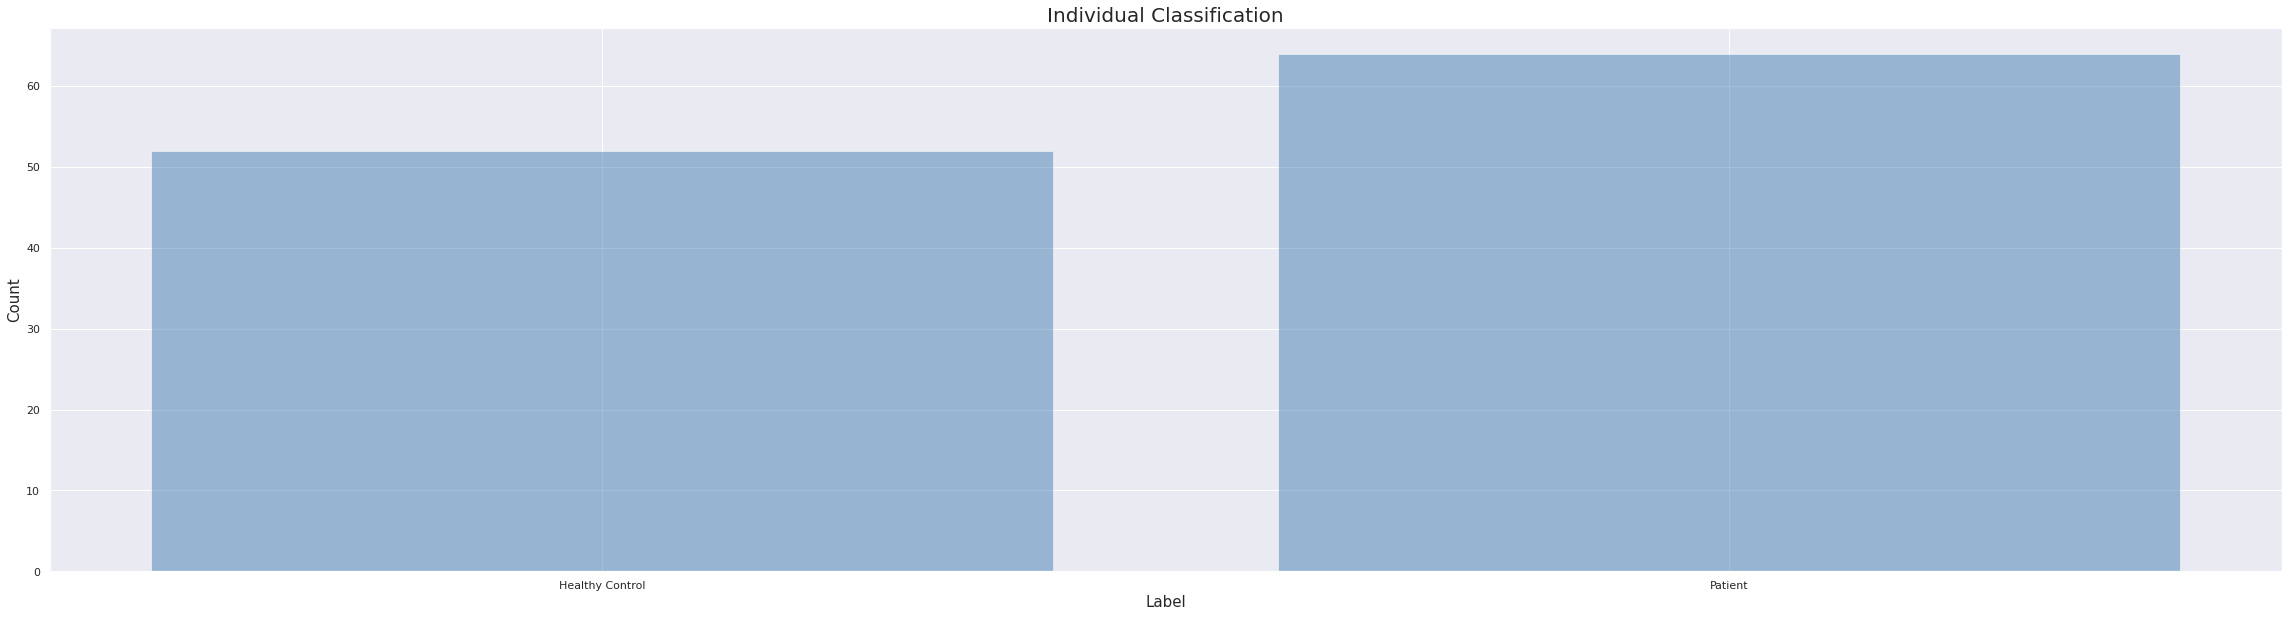

In [8]:
plot_bar(df, 'Classification', ['Healthy Control', 'Patient'], 'Individual Classification', 'Label', 'Count')

As seen above, the bar plot representing the individual classification shows that we have 64 cancer patients and 52 healthy controls.

## Histograms

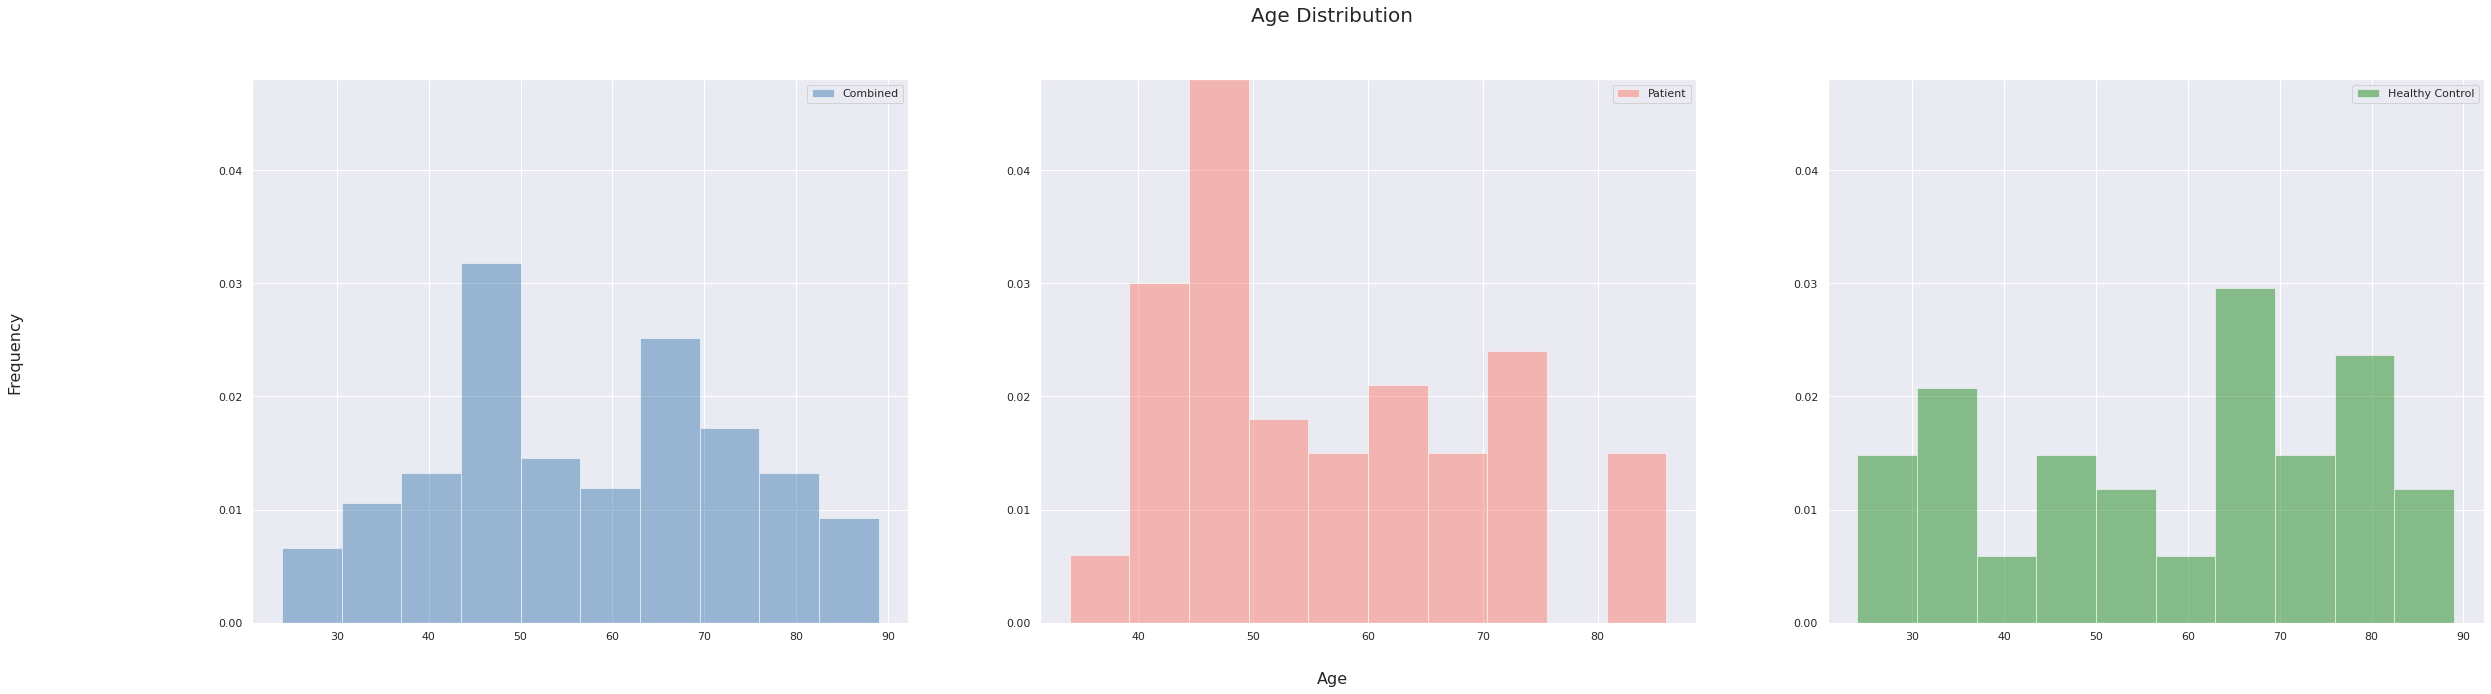

In [9]:
column = 'Age'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The cancer patient and healthy control show to have fairly different age distributions. The cancer patients tend to (on average) be younger, with the majority of them being between the age of 40 and 50. The healthy controls have a more uniform age distribution, with some smaller amounts in around 40-45 and 55-65.

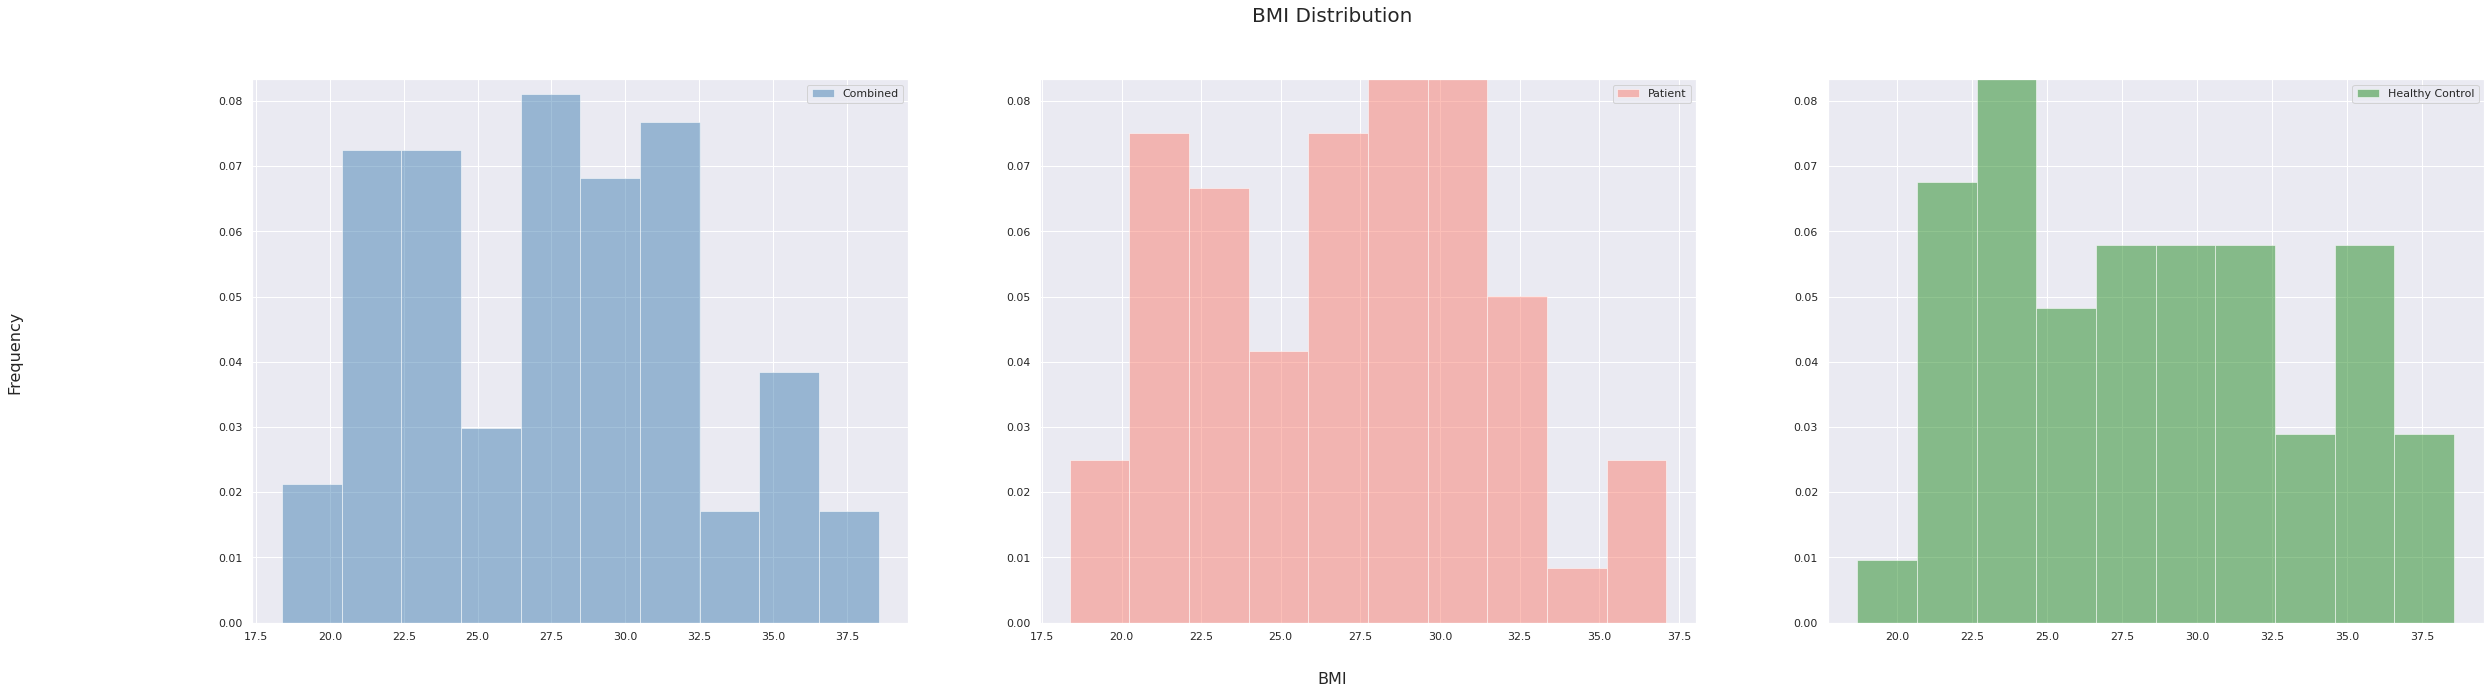

In [10]:
column = 'BMI'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

Overall, cancer patients tend to high slightly higher BMIs over healthy controls. While the difference is not drastic, there tends to be a higher noticable BMI in cancer patients over healthy controls.

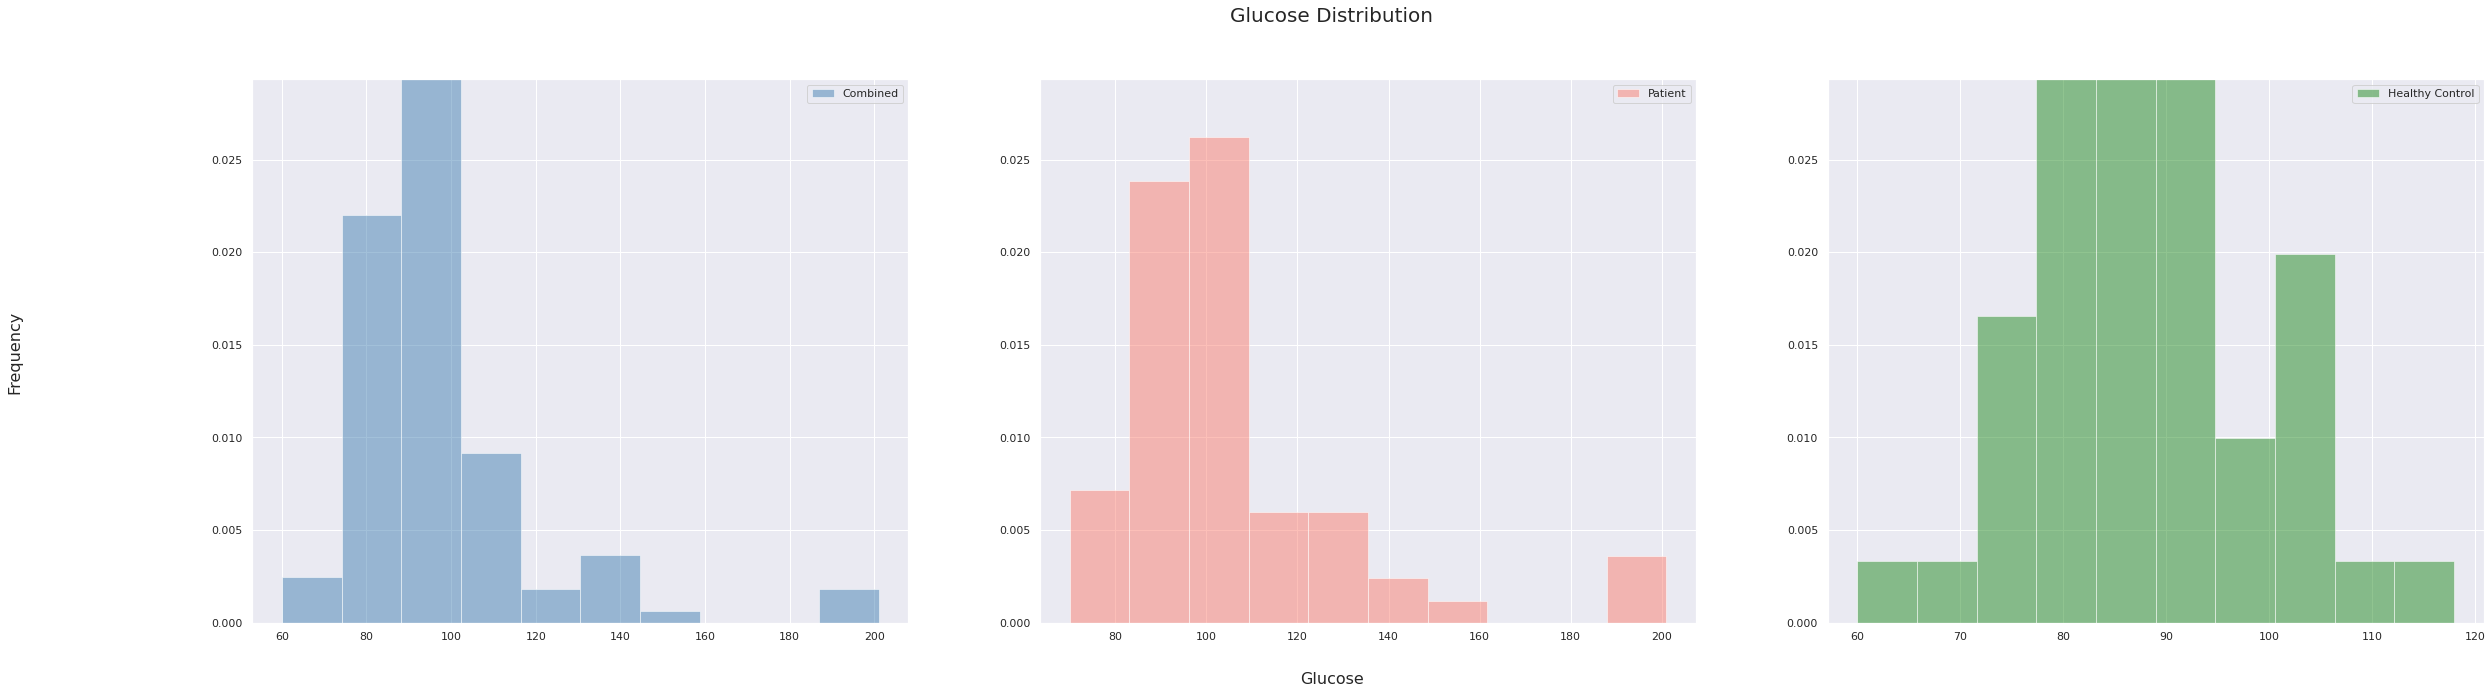

In [11]:
column = 'Glucose'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

Very important to note on this histogram is the difference in x-axis. It may seem like the glucose levels of cancer patients is significantly lower than the healthy control, but it is exactly the opposite. Cancer patients have higher glucose levels than healthy control.

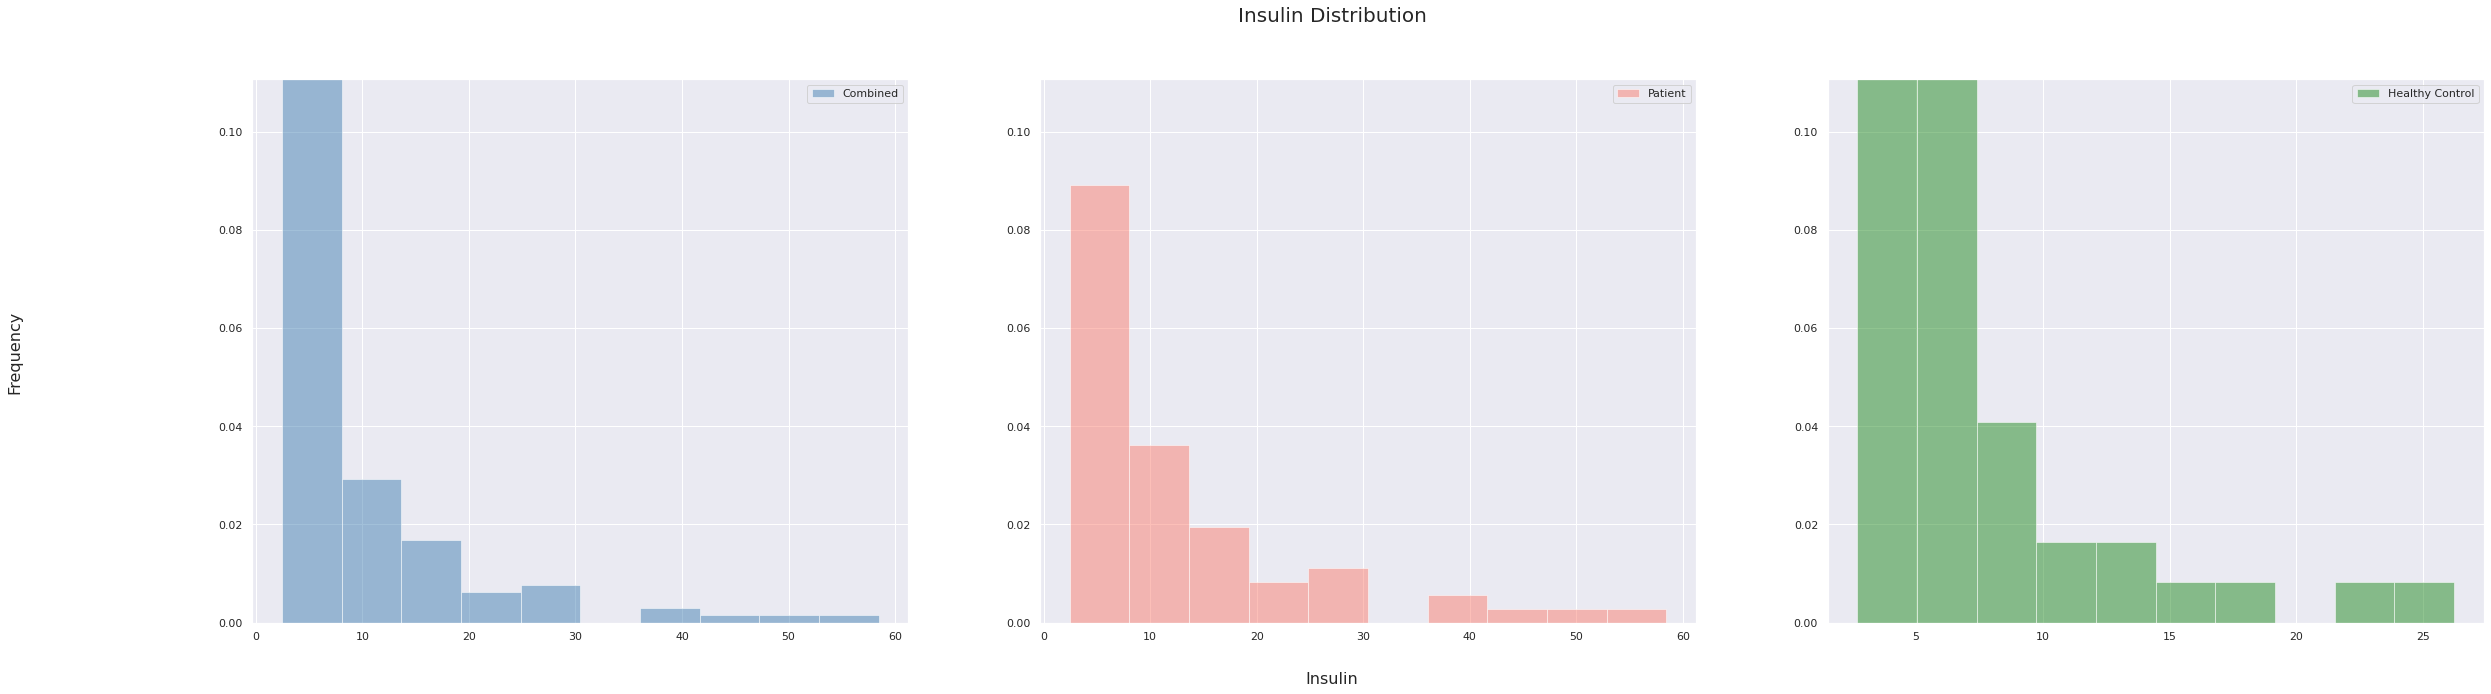

In [12]:
column = 'Insulin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

As above, the x-axis is different on this histogram. Similarly, the insulin levels in cancer patients tends to be much higher than that of the healthy controls.

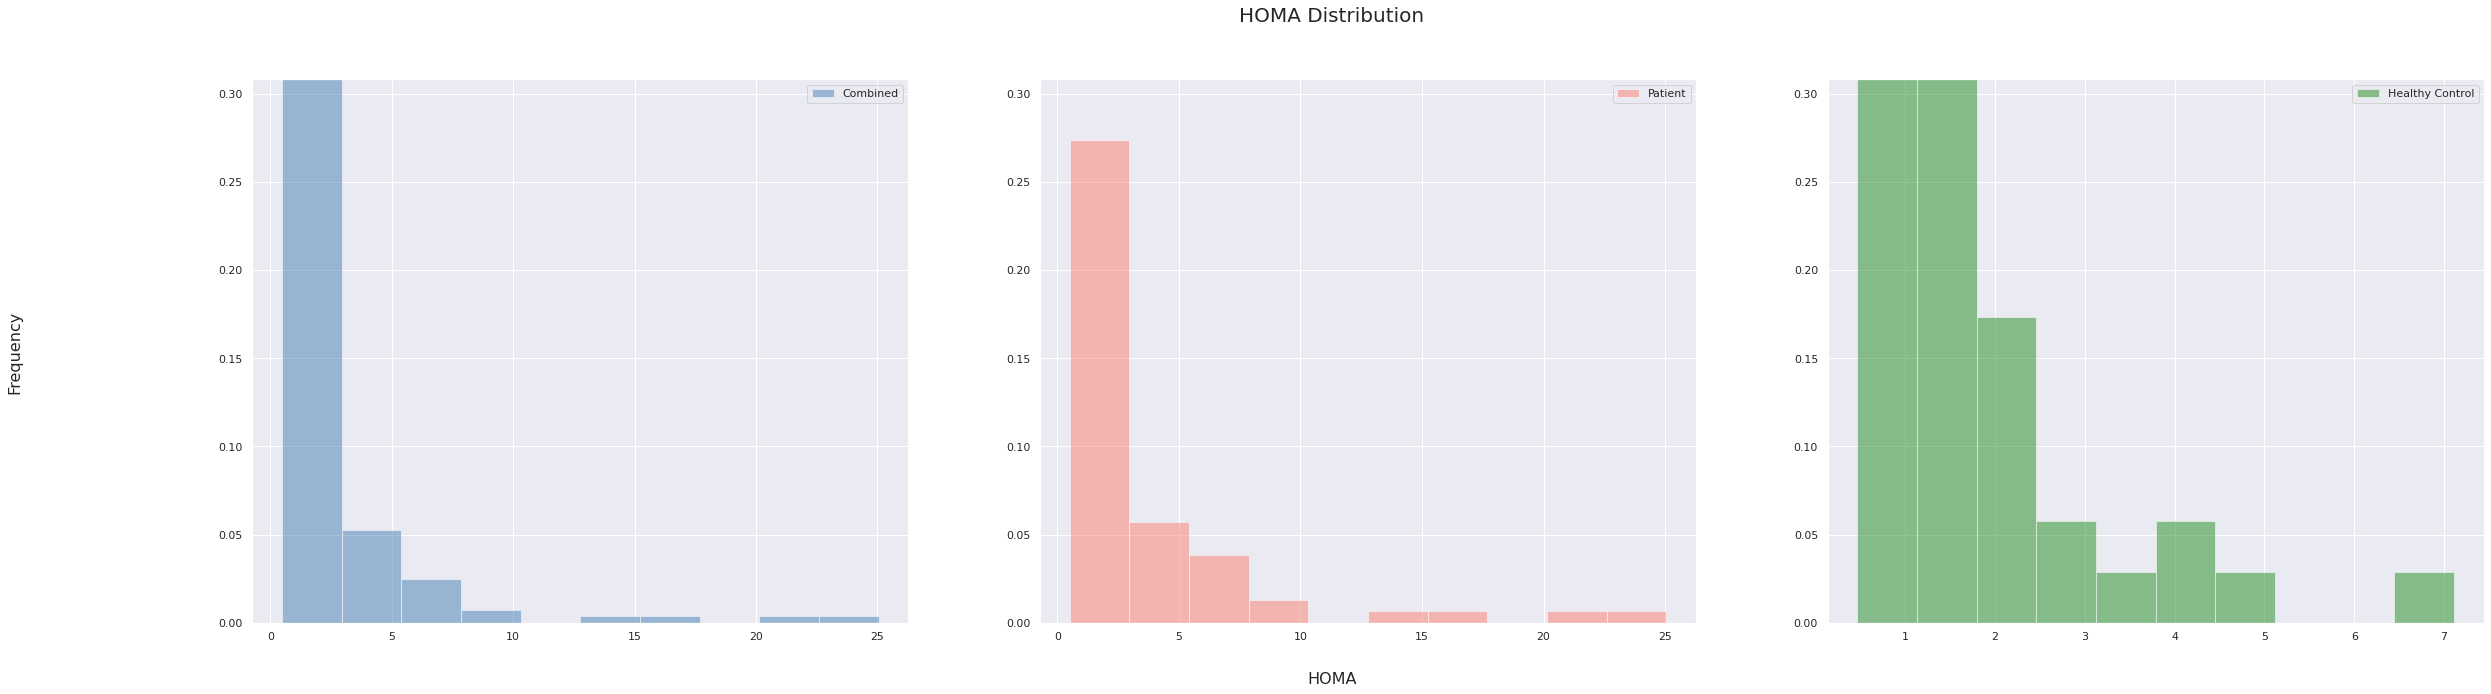

In [13]:
column = 'HOMA'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

Again, different x-axis scales. The HOMA levels in cancer patients reaches much higher values (more than triple) than that of the healthy controls. A pluralality of the cancer patients do have HOMA levels similar to that of the healthy controls, but on average, tend to have much higher levels.

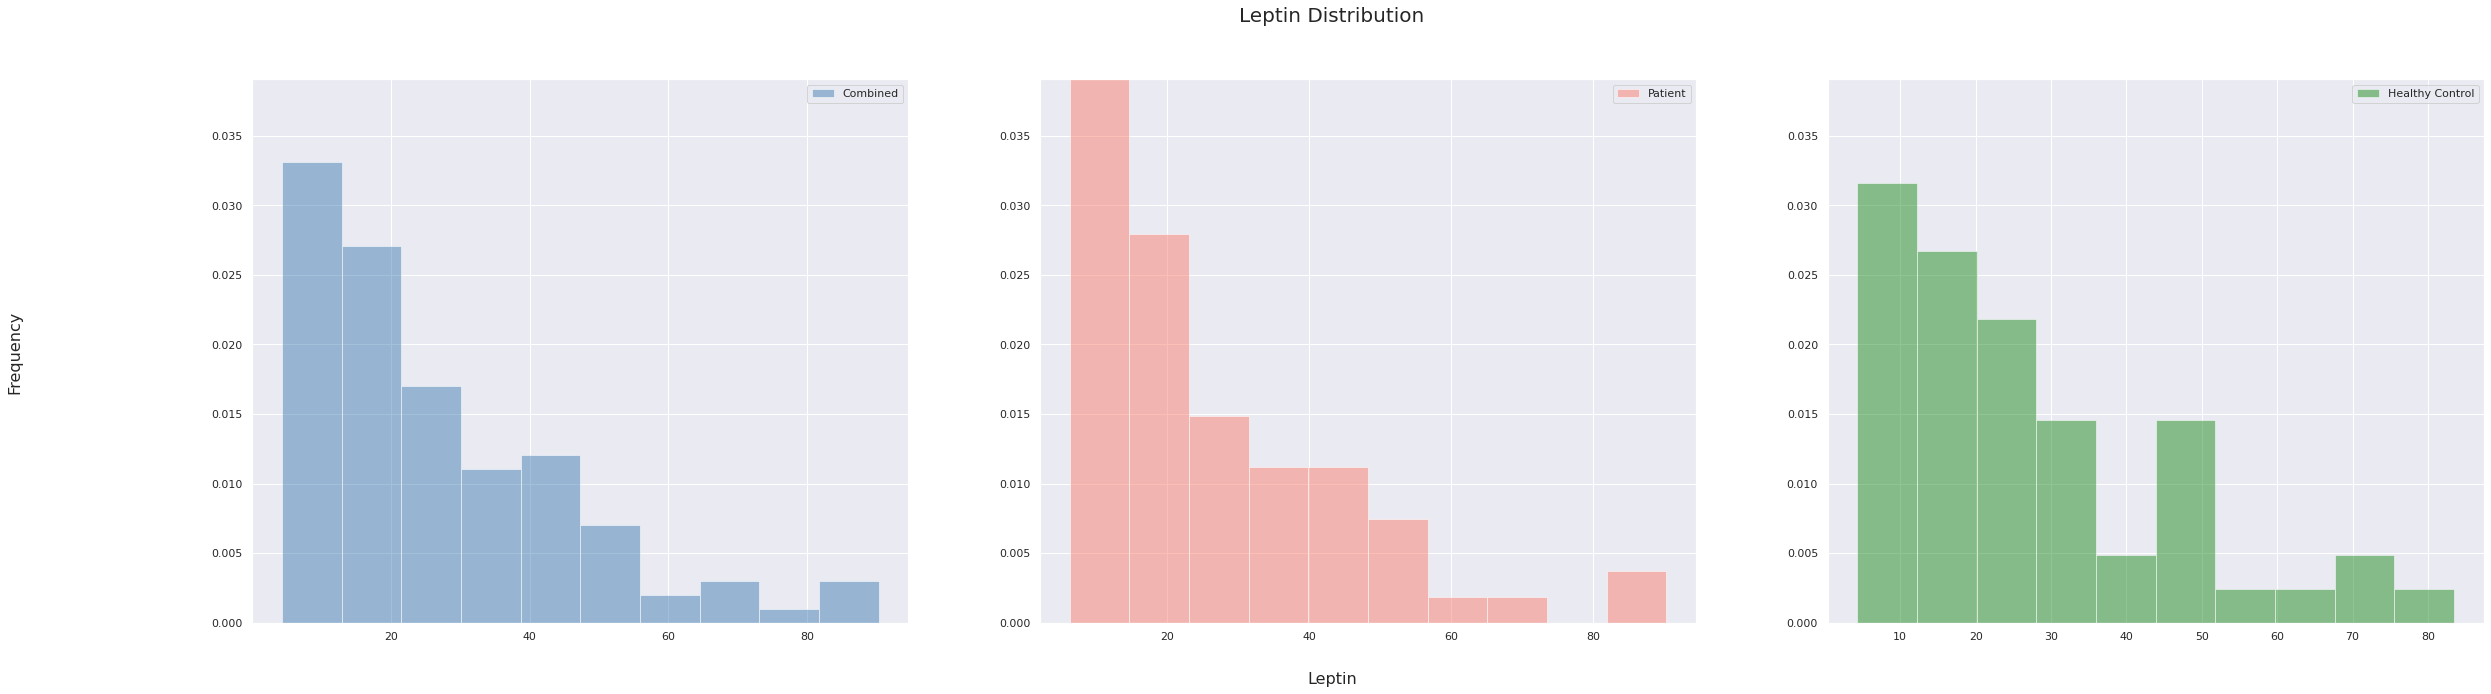

In [14]:
column = 'Leptin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The leptin levels across cancer patients and healthy controls is very similar. There is a potential for reason that leptin may not be a factor to consider to predict whether an individual has cancer or not.

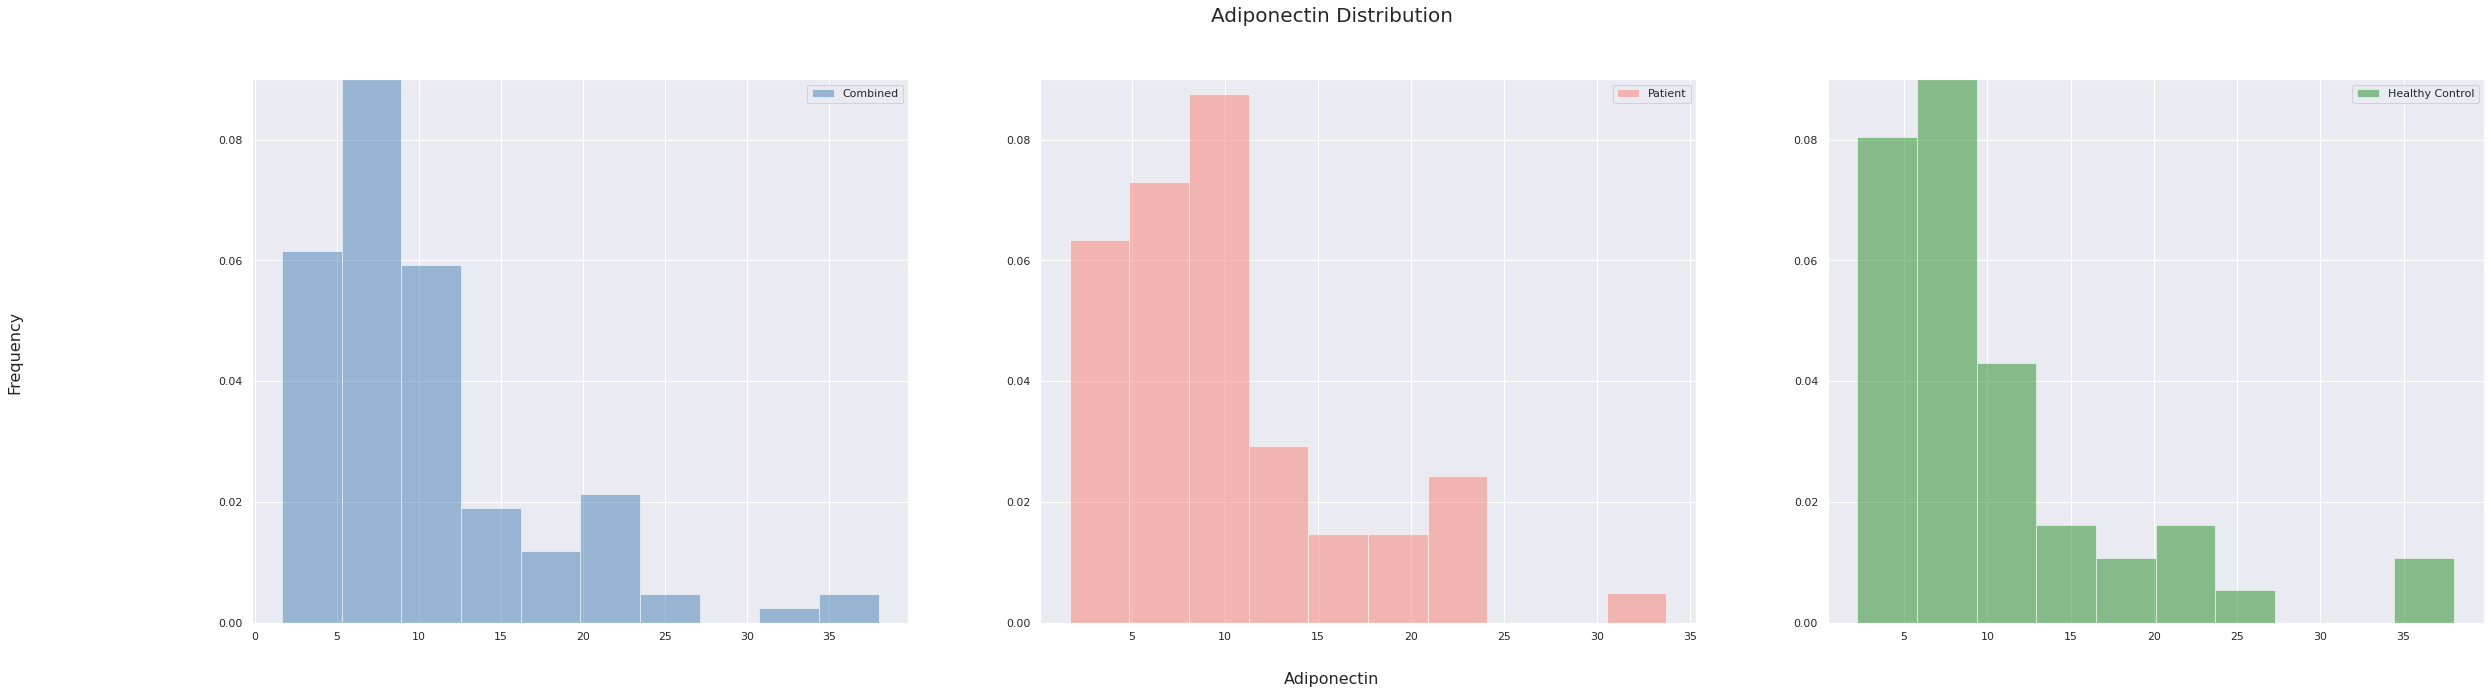

In [15]:
column = 'Adiponectin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

While the x-axis scales are different, the values show a similar result as above, no significant difference. The same result of leptin can potentially be drawn for Adiponectin as well.

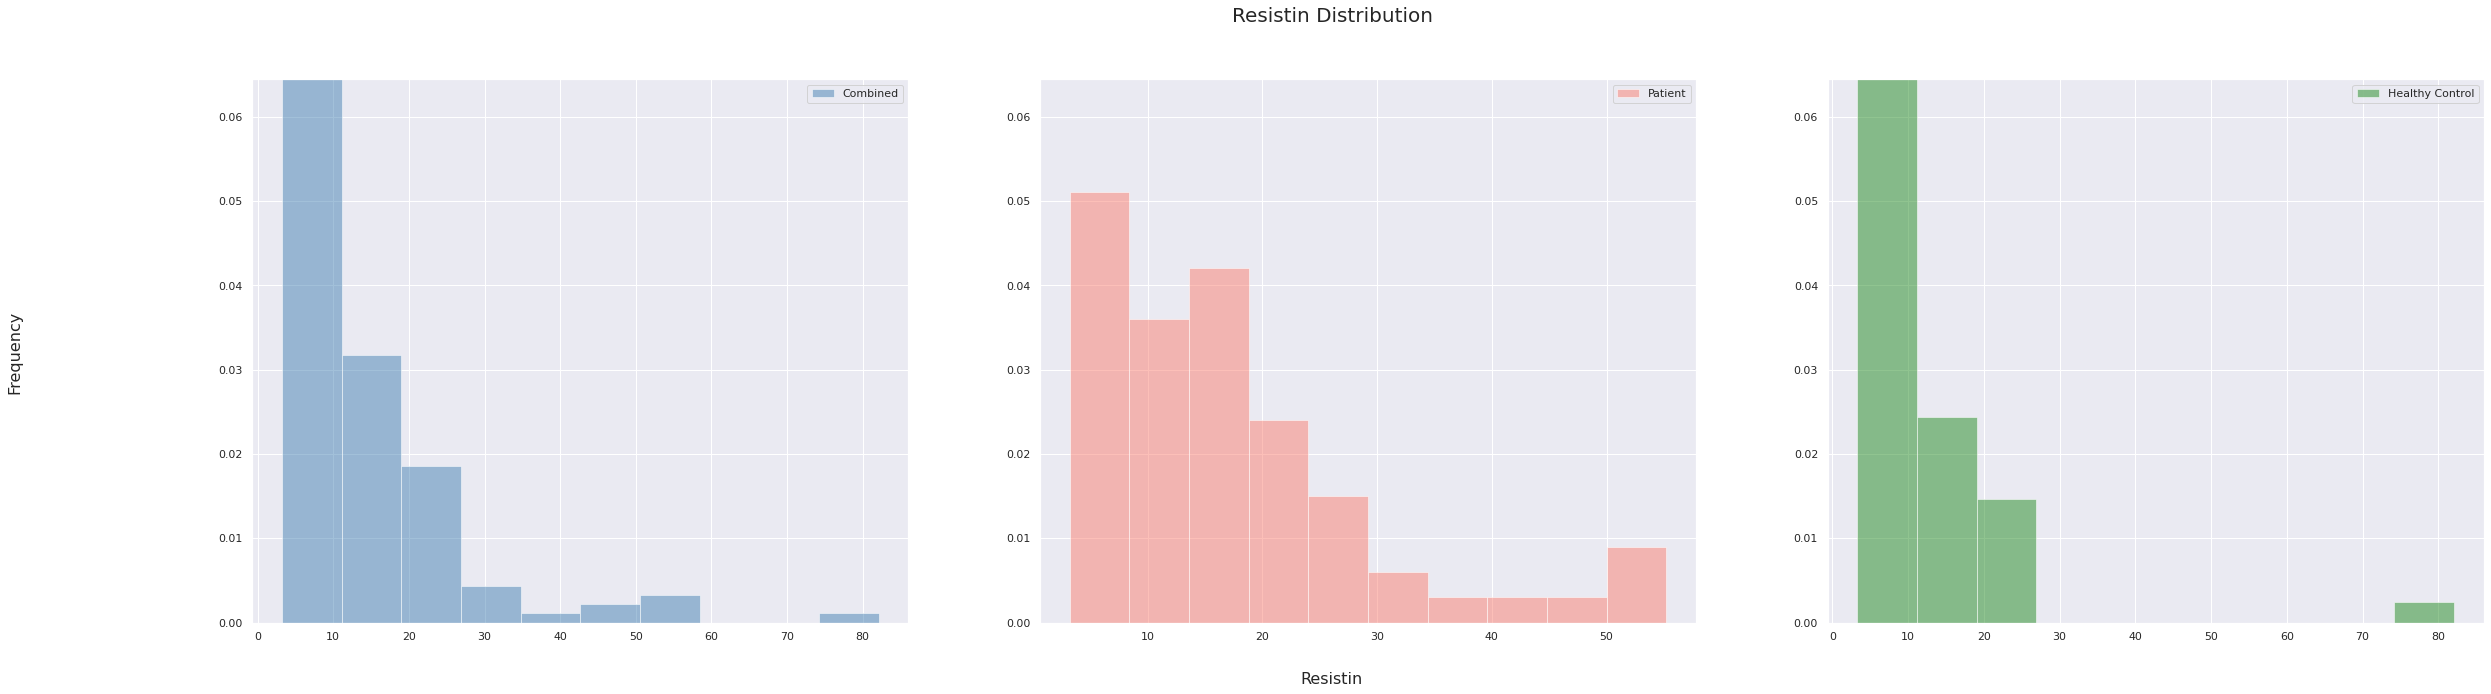

In [16]:
column = 'Resistin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

Again, the x-axis scale is different across the histograms. The distribution of resistin across cancer patients is different to that across the healthy controls, but the average resistin value seems to be around the same in both, being a bit higher in cancer patients than in healthy controls.

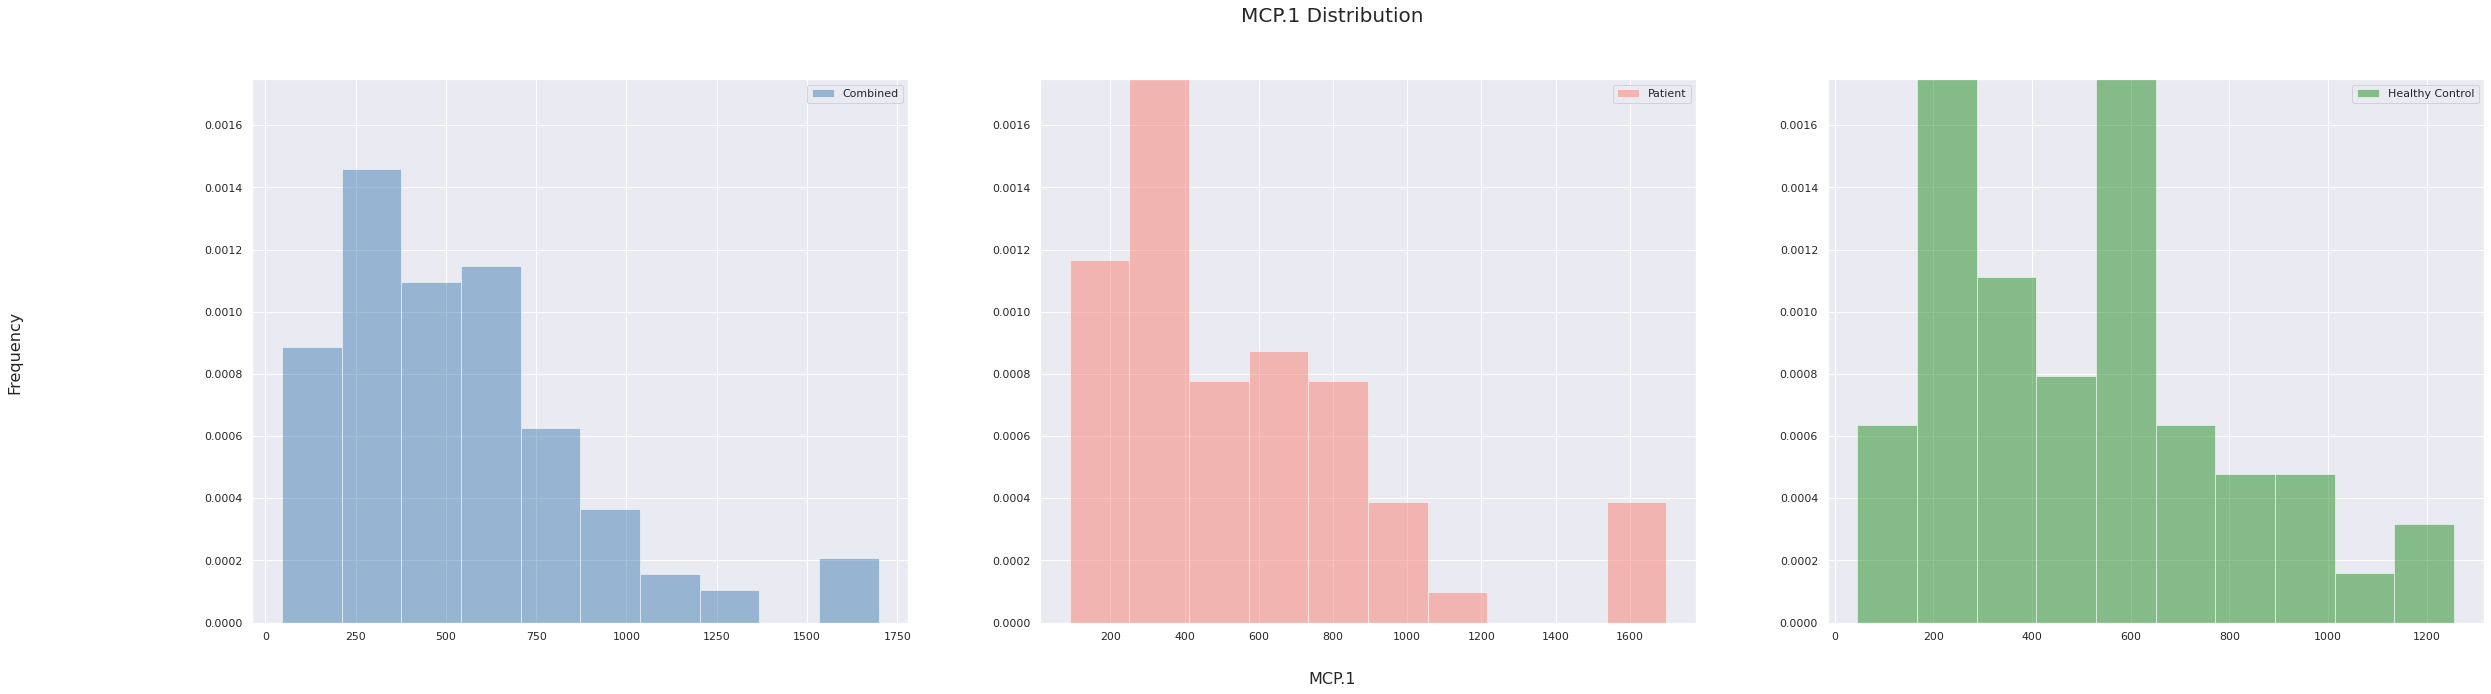

In [17]:
column = 'MCP.1'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

As above, the x-axis scales differ across the histograms, and a similar conclusion to resistin can be drawn. The distributions are quite different, but the averages seem to be similar.

## Univariate Variable Analysis Report

1. Age: Cancer patients tend to be younger than healthy controls
2. BMI: Cancer patients tend to have higher BMI than healthy controls
3. Glucose: Cancer patients tend to have higher glucose than healthy controls
4. Insulin: Cancer patients tend to have much higher insulin than healthy controls 
5. HOMA: Cancer patients tend to have higher HOMA than healthy controls
6. Leptin: No significant trend determined
7. Adiponectin: No significant trend determined
8. Resistin: Cancer patients tend to have slightly higher resistin than healthy controls
9. MCP.1: Cancer patients tend to have slightly higher MCP.1 than healthy controls 

# Data Standardization

The next step in our analysis is to standardize our data. I am no doctor, so a glucose level of 70 means nothing to be. To resolve this issue, we can standardize our data. This is done by maniuplating the data such that each column will have a mean of 0 and a standard deviation of 1. Instead of the data being the acutal measurement, it will standardized to the new mean and standard deviation. That means that a glucose value of 0 is the average, a -1 is 1 standard deviation below average, and 1 is 1 standard deviation above average, and so on. This will make is much easier to work with in the future. Let us begin by determining some statistical values for our data set. Pandas and dataframes make this very easy.

In [18]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


Now, let us standardize each piece of data by subtracting it from the mean and dividing by the standard deviation. Once that is done for each piece of data, let us again determine the statistical values.

In [19]:
for column in df.columns[:-1]:
    df[column] = df[column].apply(lambda x : (x - df[column].mean()) / df[column].std())

df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,116.000000
mean,1.320783e-16,-5.992572e-16,1.799327e-16,4.115482e-17,1.914178e-16,1.186790e-16,2.679849e-17,2.555427e-16,-1.148507e-16,0.551724
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499475
min,-2.066791e+00,-1.835032e+00,-1.677817e+00,-7.529064e-01,-6.116289e-01,-1.162682e+00,-1.245715e+00,-9.294081e-01,-1.413085e+00,0.000000
25%,-7.634769e-01,-9.180839e-01,-5.346511e-01,-5.614786e-01,-4.879188e-01,-7.455135e-01,-6.877622e-01,-6.330746e-01,-7.651317e-01,0.000000
50%,-8.078837e-02,1.599667e-02,-2.571837e-01,-4.060072e-01,-3.607999e-01,-3.307086e-01,-2.671475e-01,-3.146104e-01,-1.830650e-01,1.000000
75%,8.501505e-01,7.289308e-01,1.867643e-01,1.169240e-01,4.470017e-02,5.610726e-01,2.389324e-01,2.444781e-01,4.782652e-01,1.000000
max,1.967277e+00,2.190508e+00,4.581849e+00,4.812180e+00,6.138135e+00,3.318769e+00,4.070983e+00,5.437492e+00,3.364413e+00,1.000000


As we can now see, the means for each column are 0 (slightly above due to computer error) and the standard deviations are all 1. Also notice that I did not standardize the Classification column as this will not produce any meaningful result.

# Distribution Modeling

Now equiped with out standardized data, let us jump into some modeling. This is not yet the prediction model, but modeling our data as distributions. Statistical distributions provide parameterized mathematical functions that can be used to calculate the probability for any individual observation from the sample space. Essentially, distributions are heavily studied areas of statistics that tend to show up in everyday life. The distributions that I am going to be attempting to fit are the Normal, Gamma, and Beta distributions. Should we find a distribution that fits out data properly, statisticians would be able to tell us a lot more about our data. 

Read more about the Normal: https://en.wikipedia.org/wiki/Normal_distribution  
Read more about the Gamma: https://en.wikipedia.org/wiki/Gamma_distribution  
Read more about the Beta: https://en.wikipedia.org/wiki/Beta_distribution  

Let us begin by writing some funcitons to produce these distributions. Then, let us modify our histogram function from above to also include the distributions.

In [20]:
# Fits a Normal Distribution to data
def fit_normal_distribution(df, column, linspace, ax, ax_number):
    normal = stats.norm.pdf(linspace, *stats.norm.fit(df[column]))  # Create normal distribution
    ax[ax_number].plot(linspace, normal, label='Normal')    # Plot distribution

# Fits a Gamma Distribution to data
def fit_gamma_distribution(df, column, linspace, ax, ax_number):
    gamma = stats.gamma.pdf(linspace, *stats.gamma.fit(df[column])) # Create gamma distribution
    ax[ax_number].plot(linspace, gamma, label='Gamma')  # Plot distribution

# Fits a Beta Distribution to data
def fit_beta_distribution(df, column, linspace, ax, ax_number):
    beta = stats.beta.pdf(linspace, *stats.beta.fit(df[column]))    # Create beta distribution
    ax[ax_number].plot(linspace, beta, label='Beta')    # Plot distribution

# Plots a Histogram of given data along with a Normal, Gamma, and Beta distribution
def plot_histogram_distribution(df, column, title='', xlabel='', ylabel=''):
    figure, ax = create_subplot(3, title, xlabel, ylabel)

    total_freq, test_freq, control_freq = 0, 0, 0
    linspace = np.linspace(df[column].min(), df[column].max())

    # Combined [0]
    total_freq, _, _ = ax[0].hist(df[column], density=True, alpha=0.5, label='Combined', color='steelblue')
    fit_normal_distribution(df, column, linspace, ax, 0)
    fit_gamma_distribution(df, column, linspace, ax, 0)
    fit_beta_distribution(df, column, linspace, ax, 0)
    # Test [1]
    test_freq, _, _ = ax[1].hist(df[df['Classification'] == 1][column], density=True, alpha=0.5, label='Patient', color='salmon')
    fit_normal_distribution(df[df['Classification'] == 1], column, linspace, ax, 1)
    fit_gamma_distribution(df[df['Classification'] == 1], column, linspace, ax, 1)
    fit_beta_distribution(df[df['Classification'] == 1], column, linspace, ax, 1)
    # Control [2]
    control_freq, _, _ = ax[2].hist(df[df['Classification'] == 0][column], density=True, alpha=0.5, label='Healthy Control', color='forestgreen')
    fit_normal_distribution(df[df['Classification'] == 0], column, linspace, ax, 2)
    fit_gamma_distribution(df[df['Classification'] == 0], column, linspace, ax, 2)
    fit_beta_distribution(df[df['Classification'] == 0], column, linspace, ax, 2)

    y_upper_bound = np.max(np.concatenate((total_freq, control_freq, test_freq), axis=None))
    for i in range(3):
        ax[i].set_ylim([0, y_upper_bound])
        ax[i].legend()

    figure.suptitle(title, fontsize=20)
    figure.text(0.5, 0.04, xlabel, ha='center', fontsize=16)
    figure.text(0.04, 0.5, ylabel, va='center', rotation='vertical', fontsize=16)
    plt.show()


## Histograms With Distributions

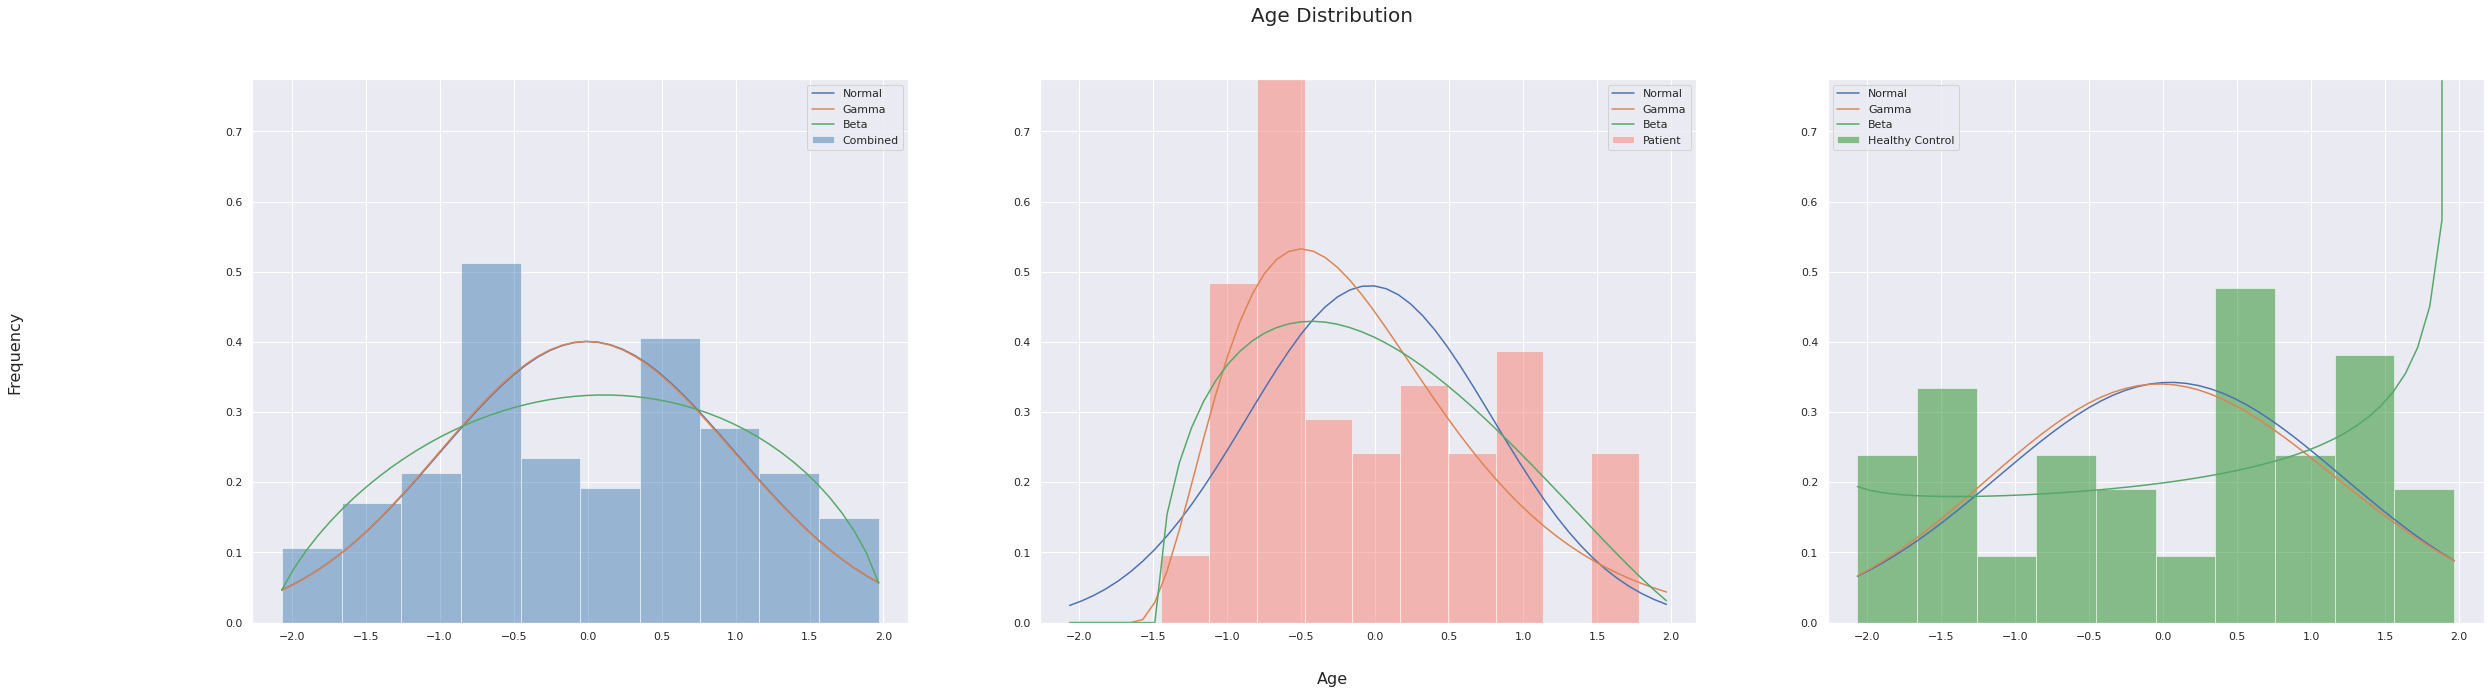

In [21]:
column = 'Age'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

No evident distributions for age distribution.

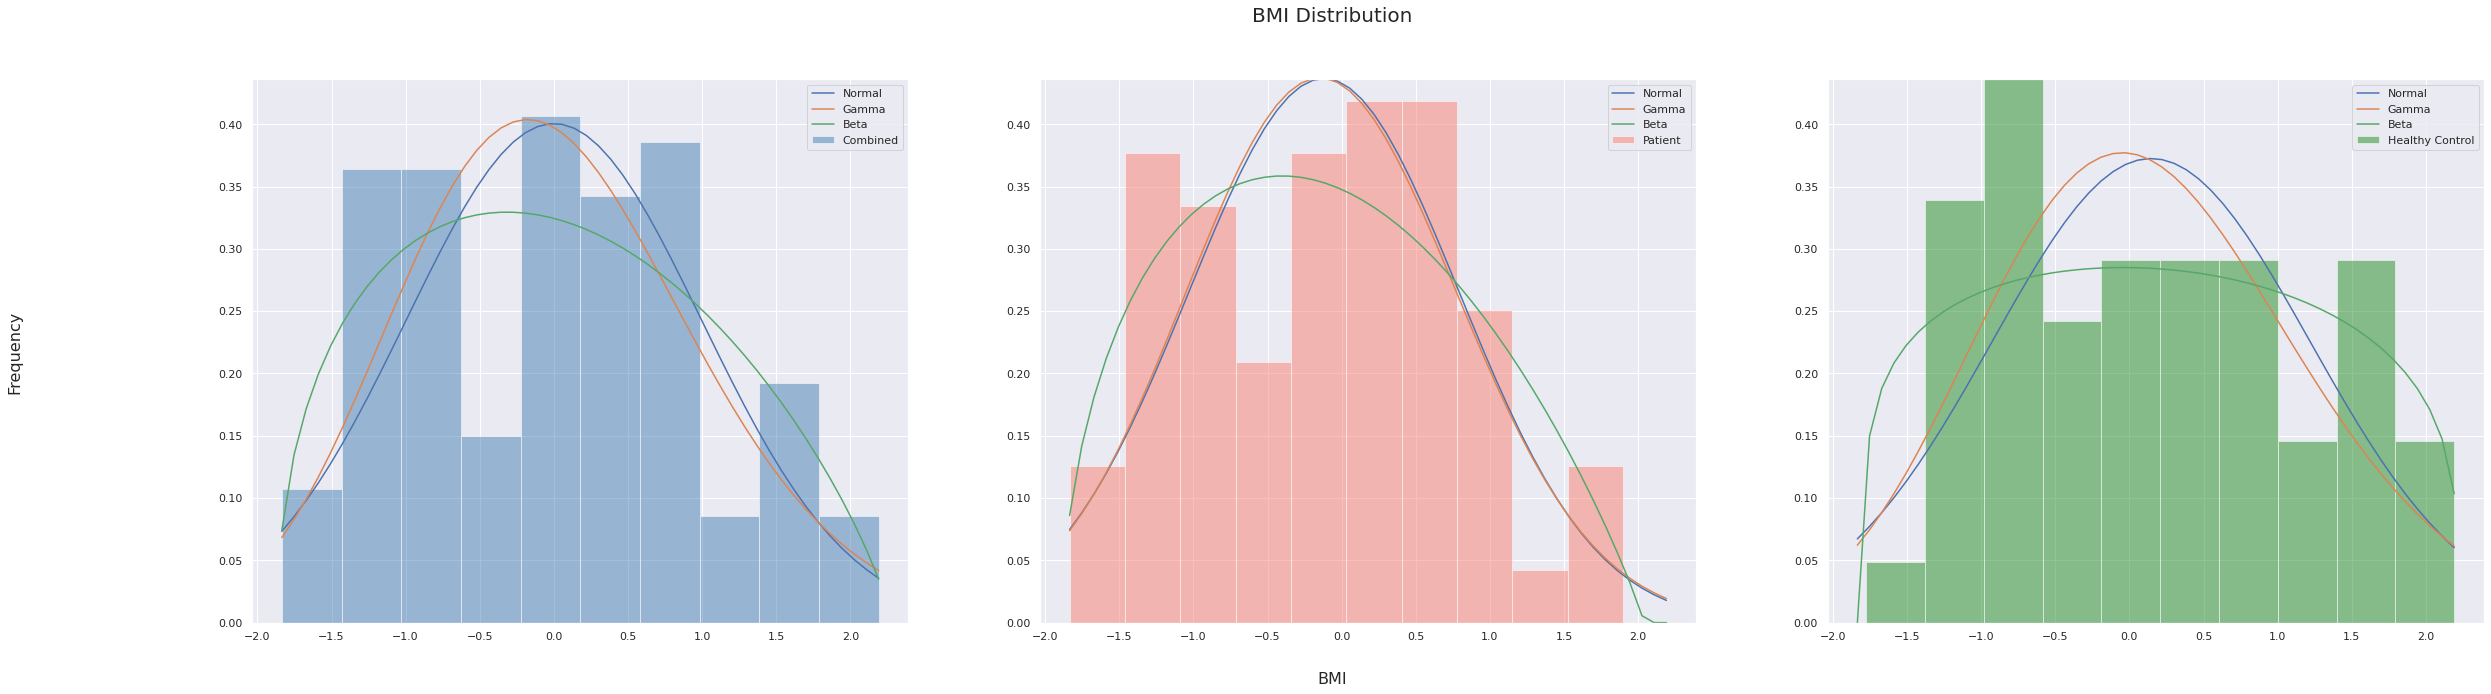

In [22]:
column = 'BMI'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Normal and Beta distributions fit our BMI distribution.

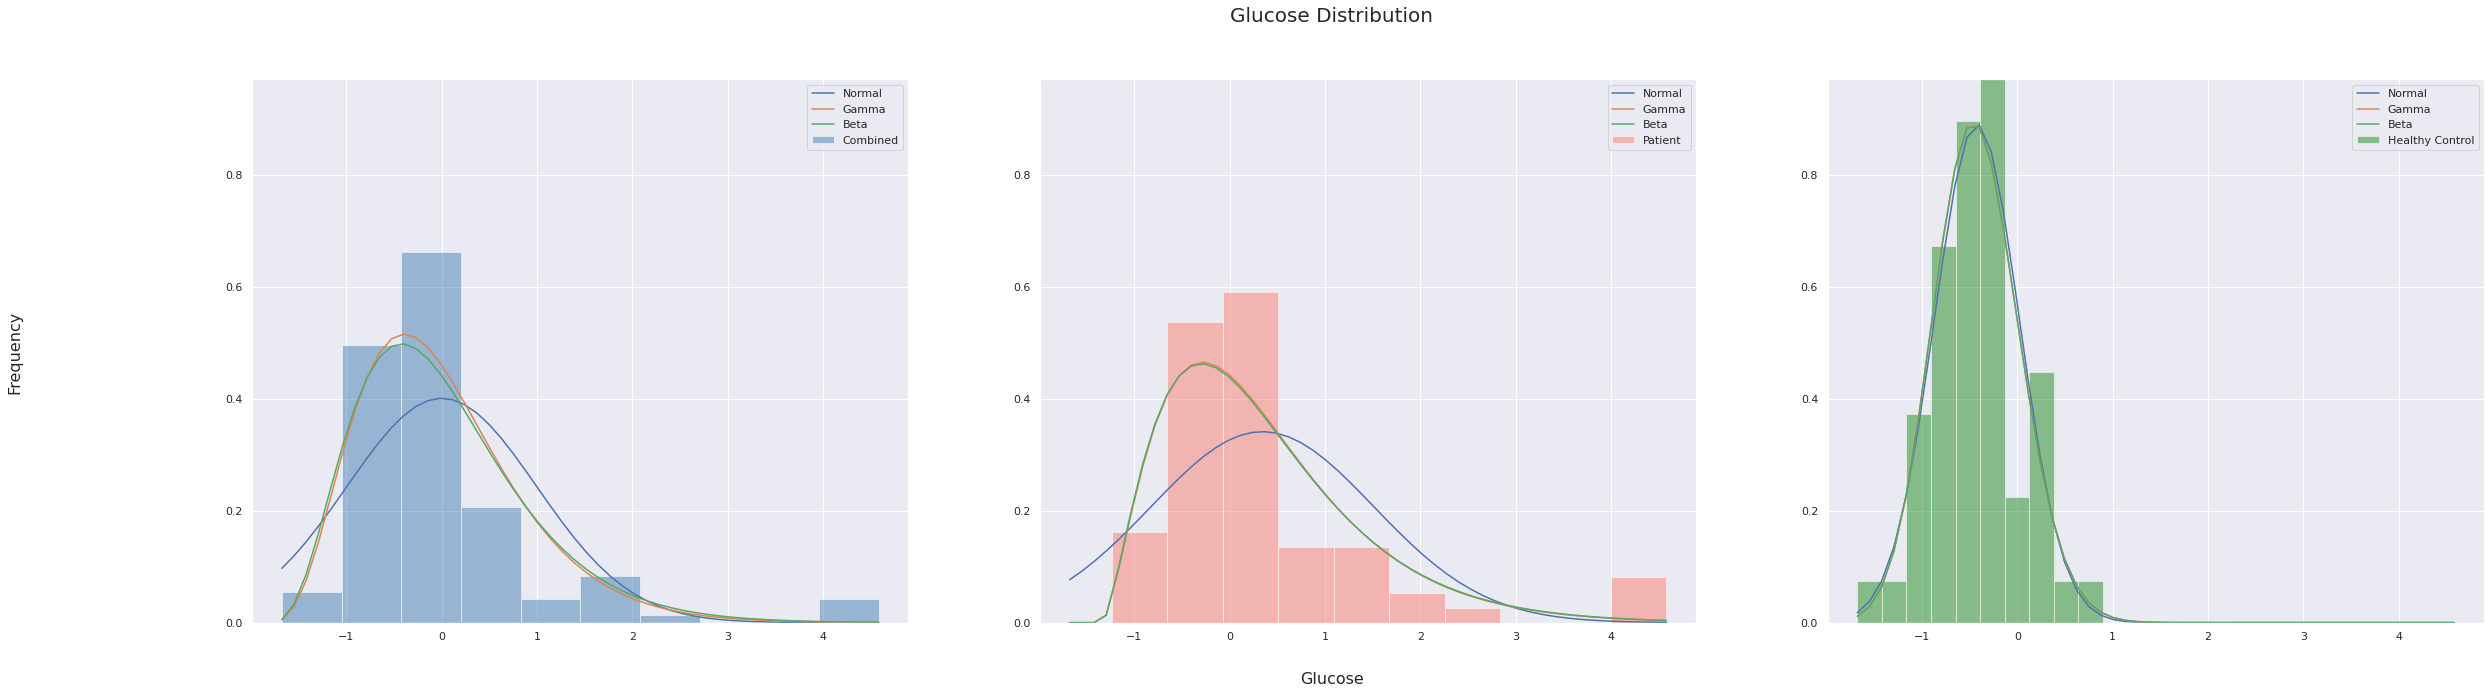

In [23]:
column = 'Glucose'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Gamma and Beta distributions fit our glucose distribution.

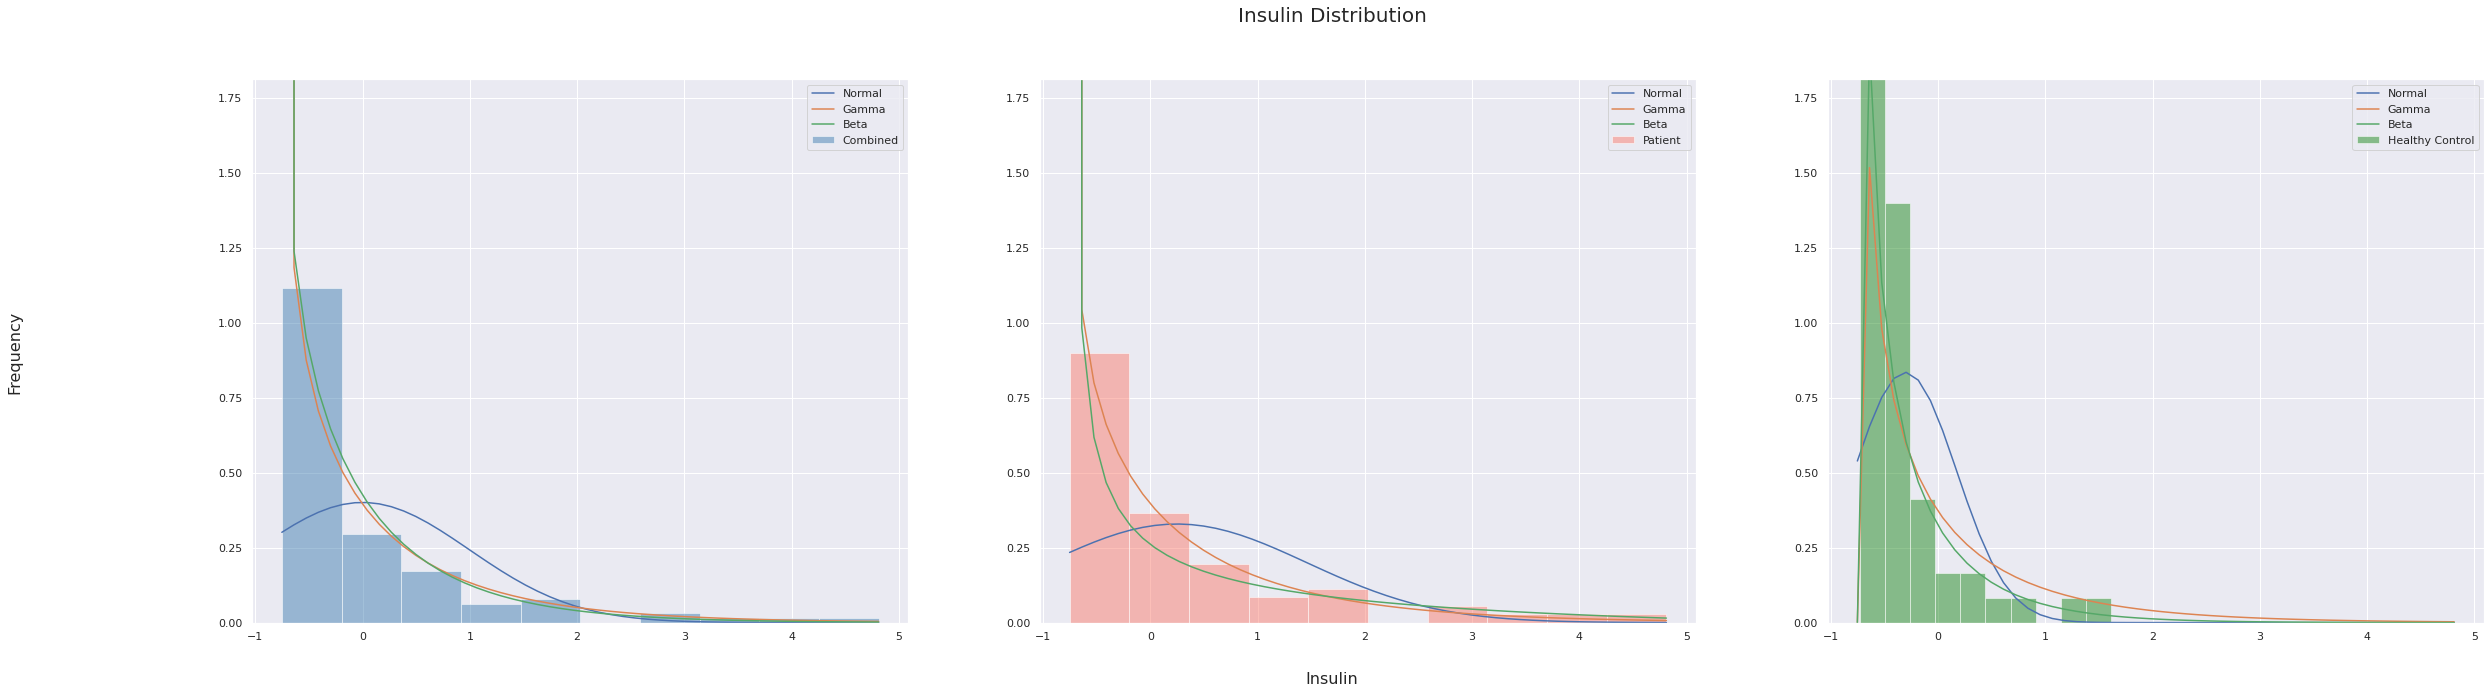

In [24]:
column = 'Insulin'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Beta distribution fits our insulin distribution.

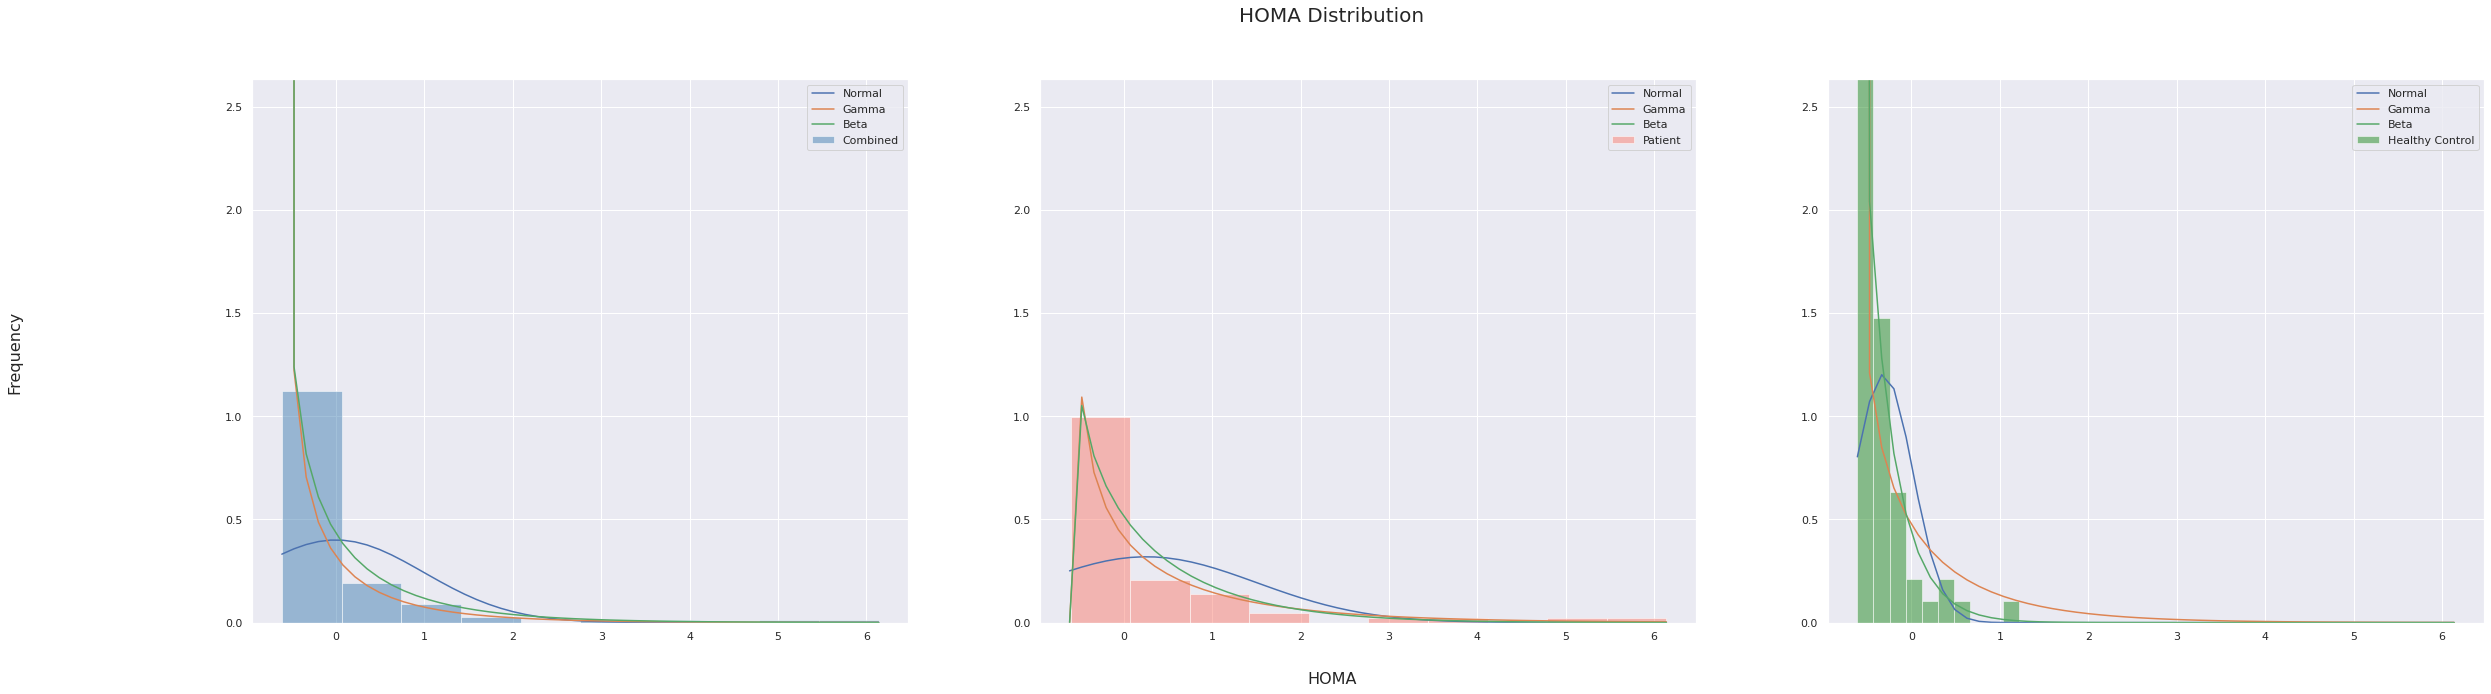

In [25]:
column = 'HOMA'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Gamma and Beta distributions fit our HOMA distribution.

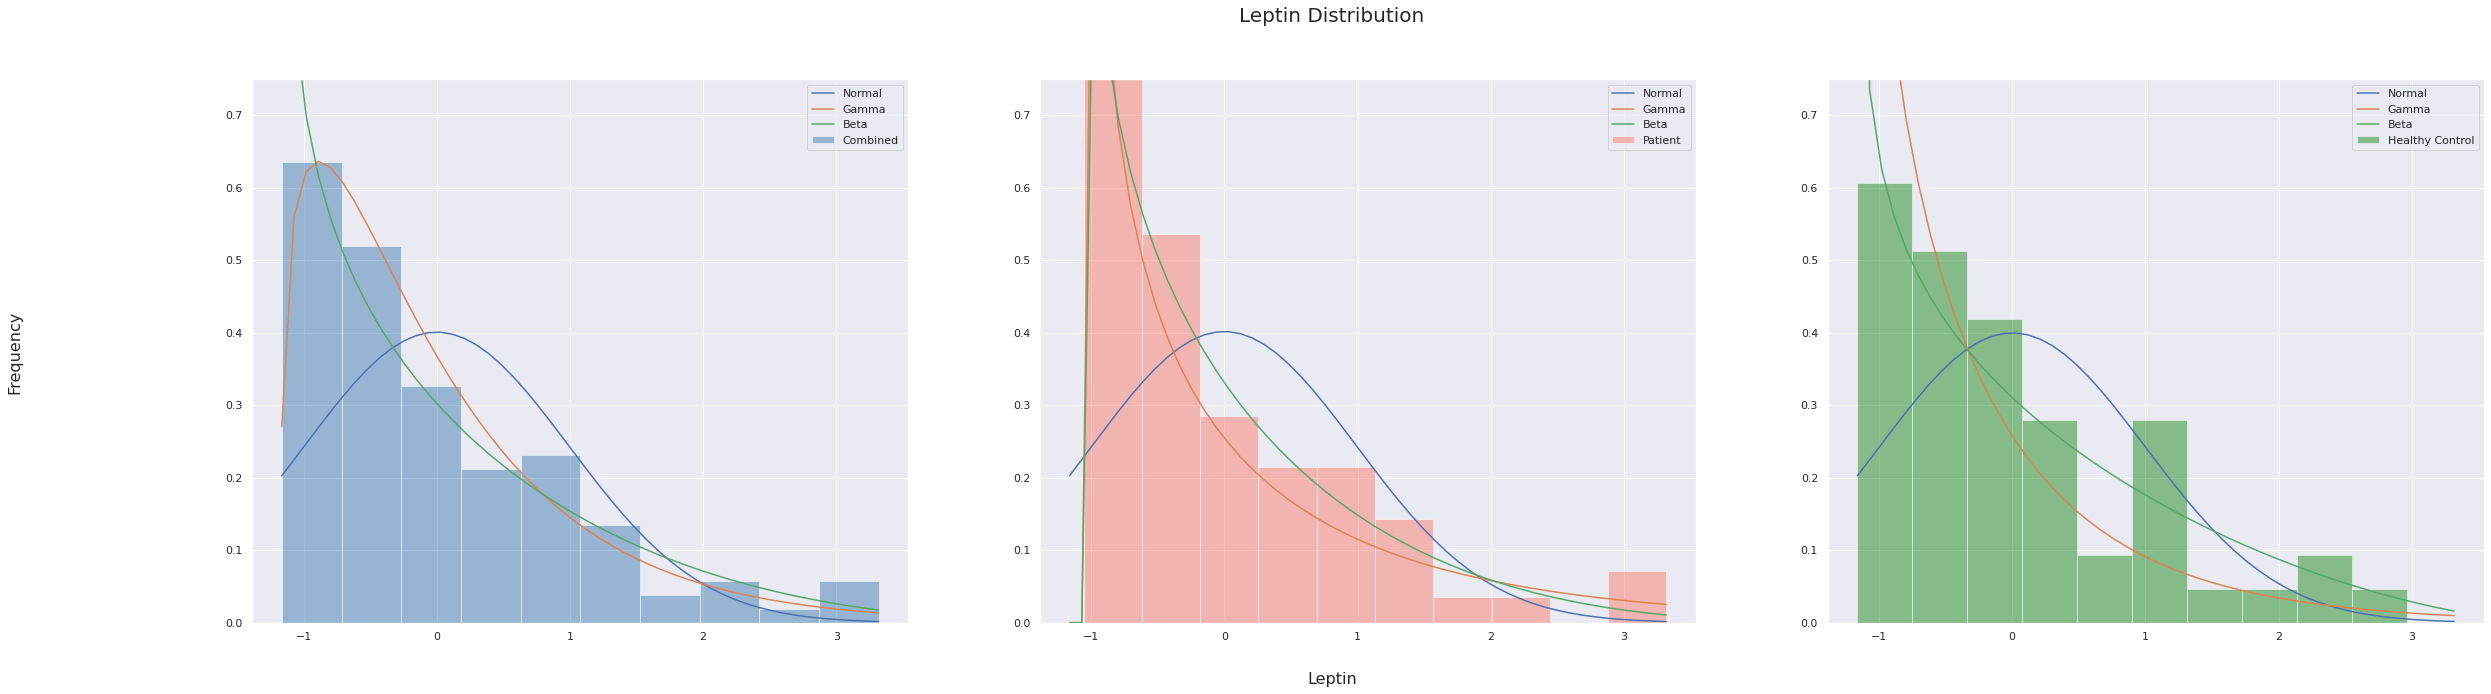

In [26]:
column = 'Leptin'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Gamma distribution fits out Leptin distribution.

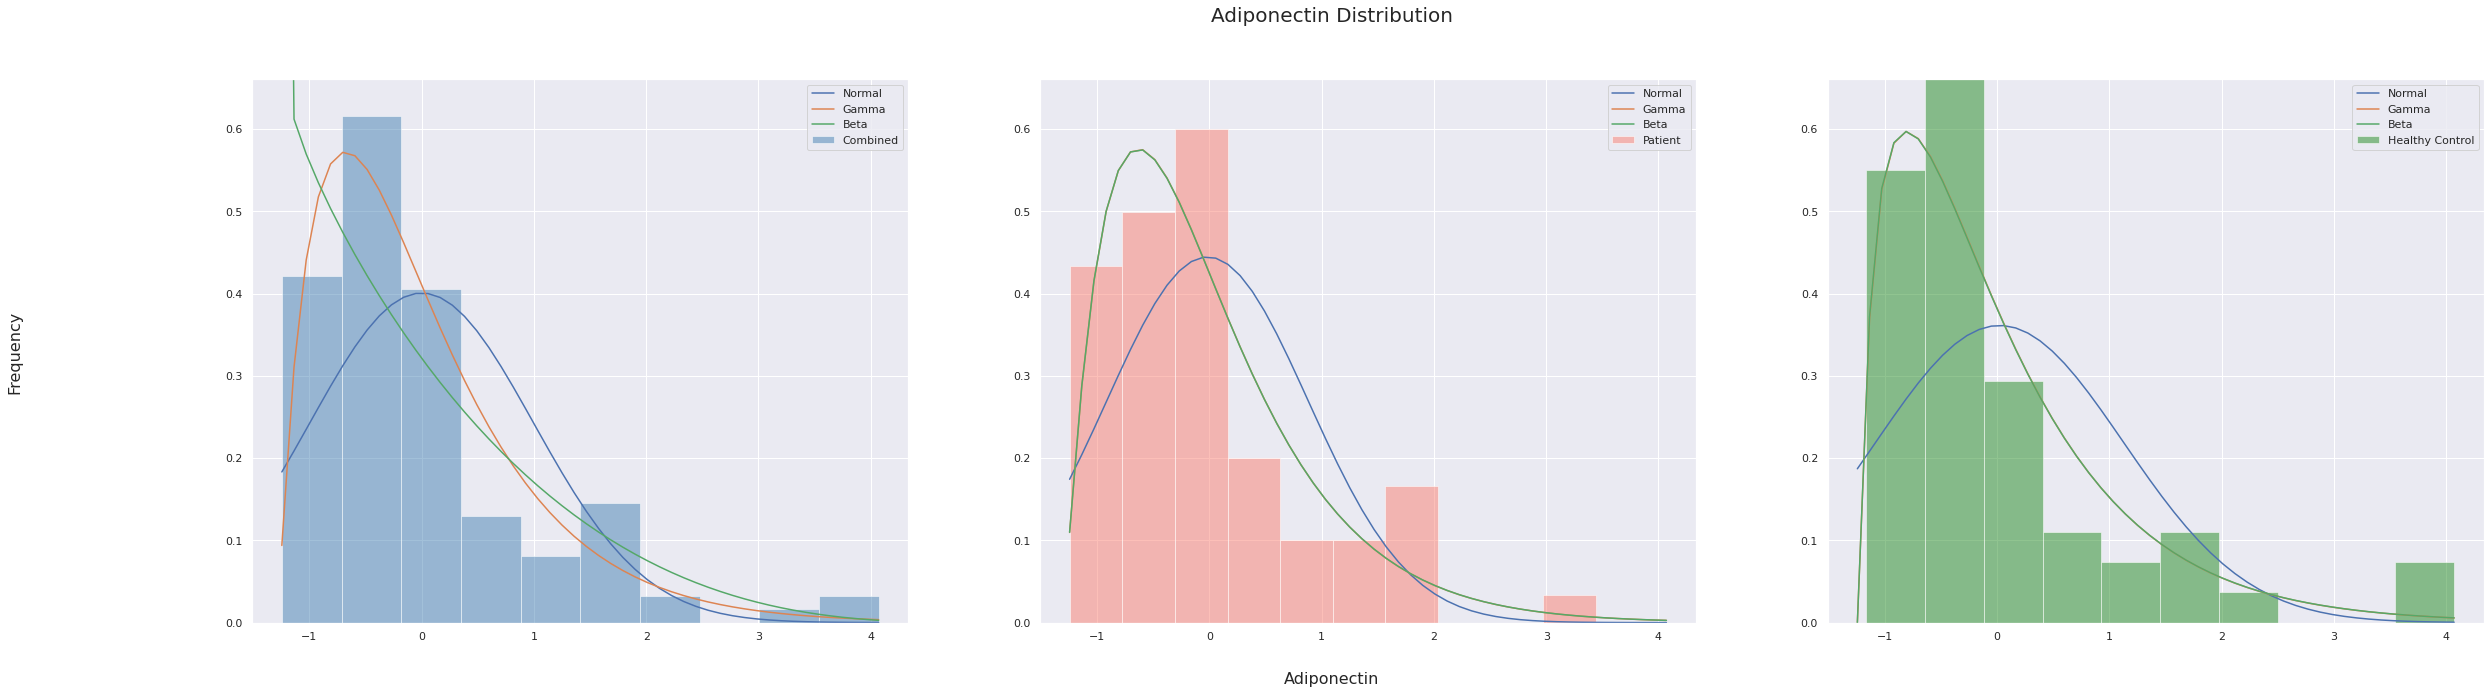

In [27]:
column = 'Adiponectin'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Gamma distribution gits our adiponectin distribution.

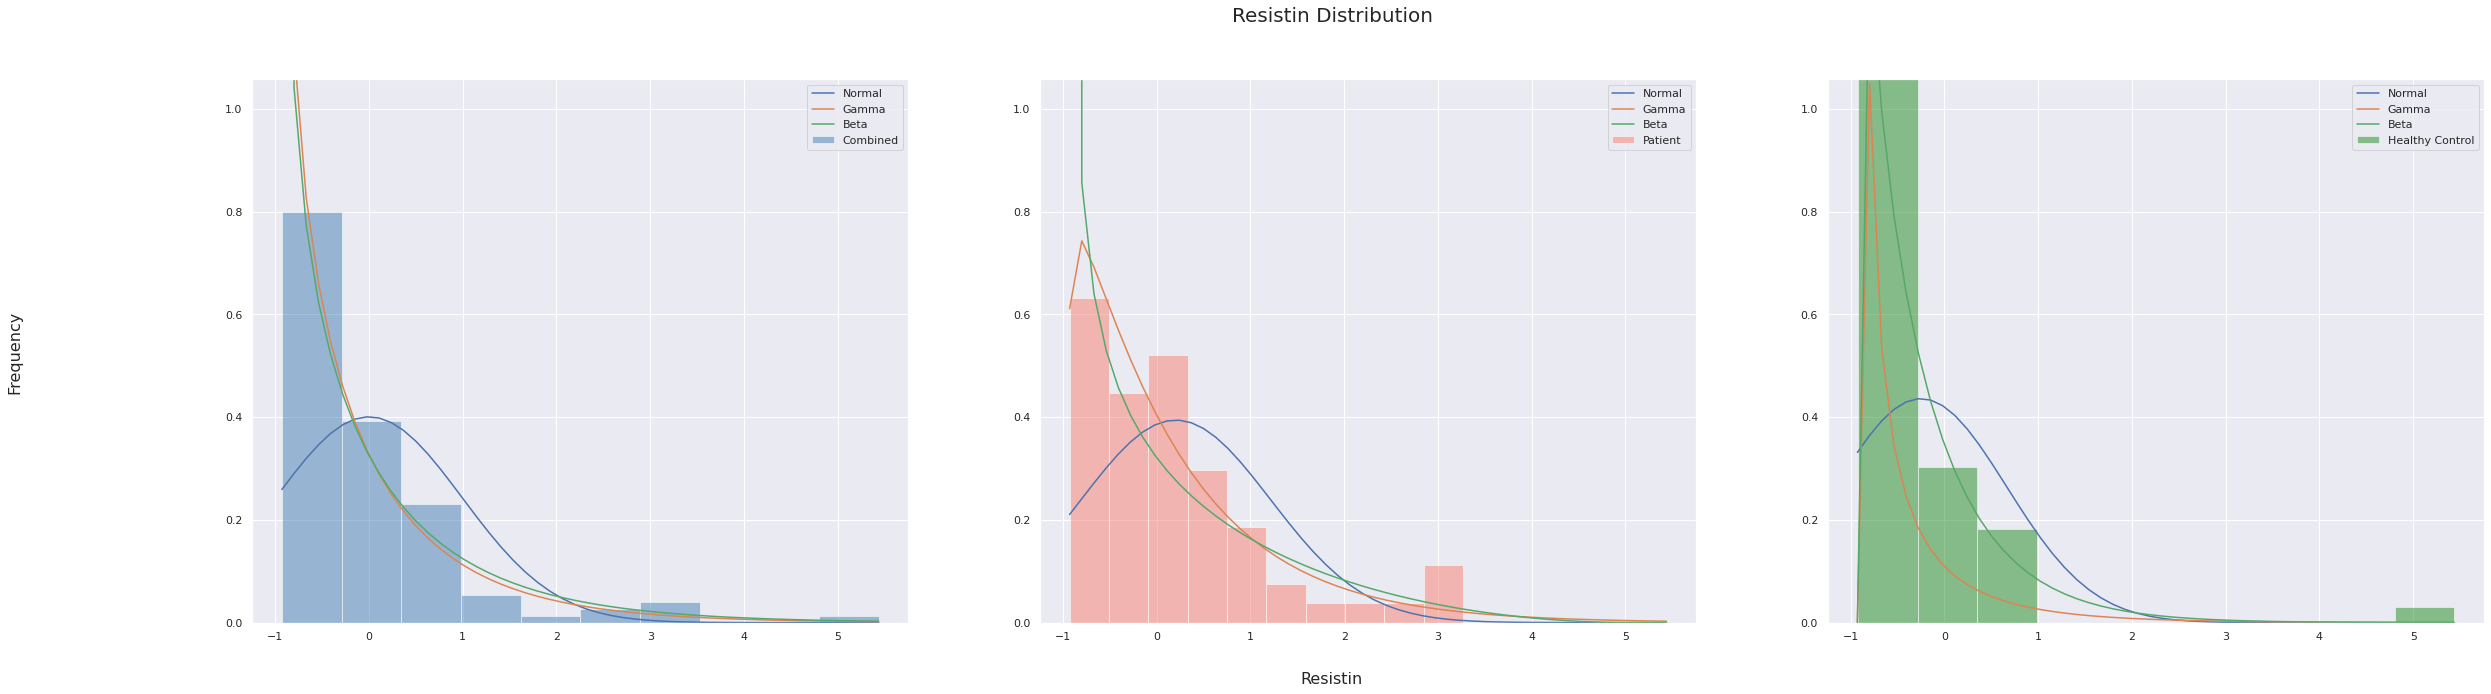

In [28]:
column = 'Resistin'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

The Beta distribution fits our resistin distribution.

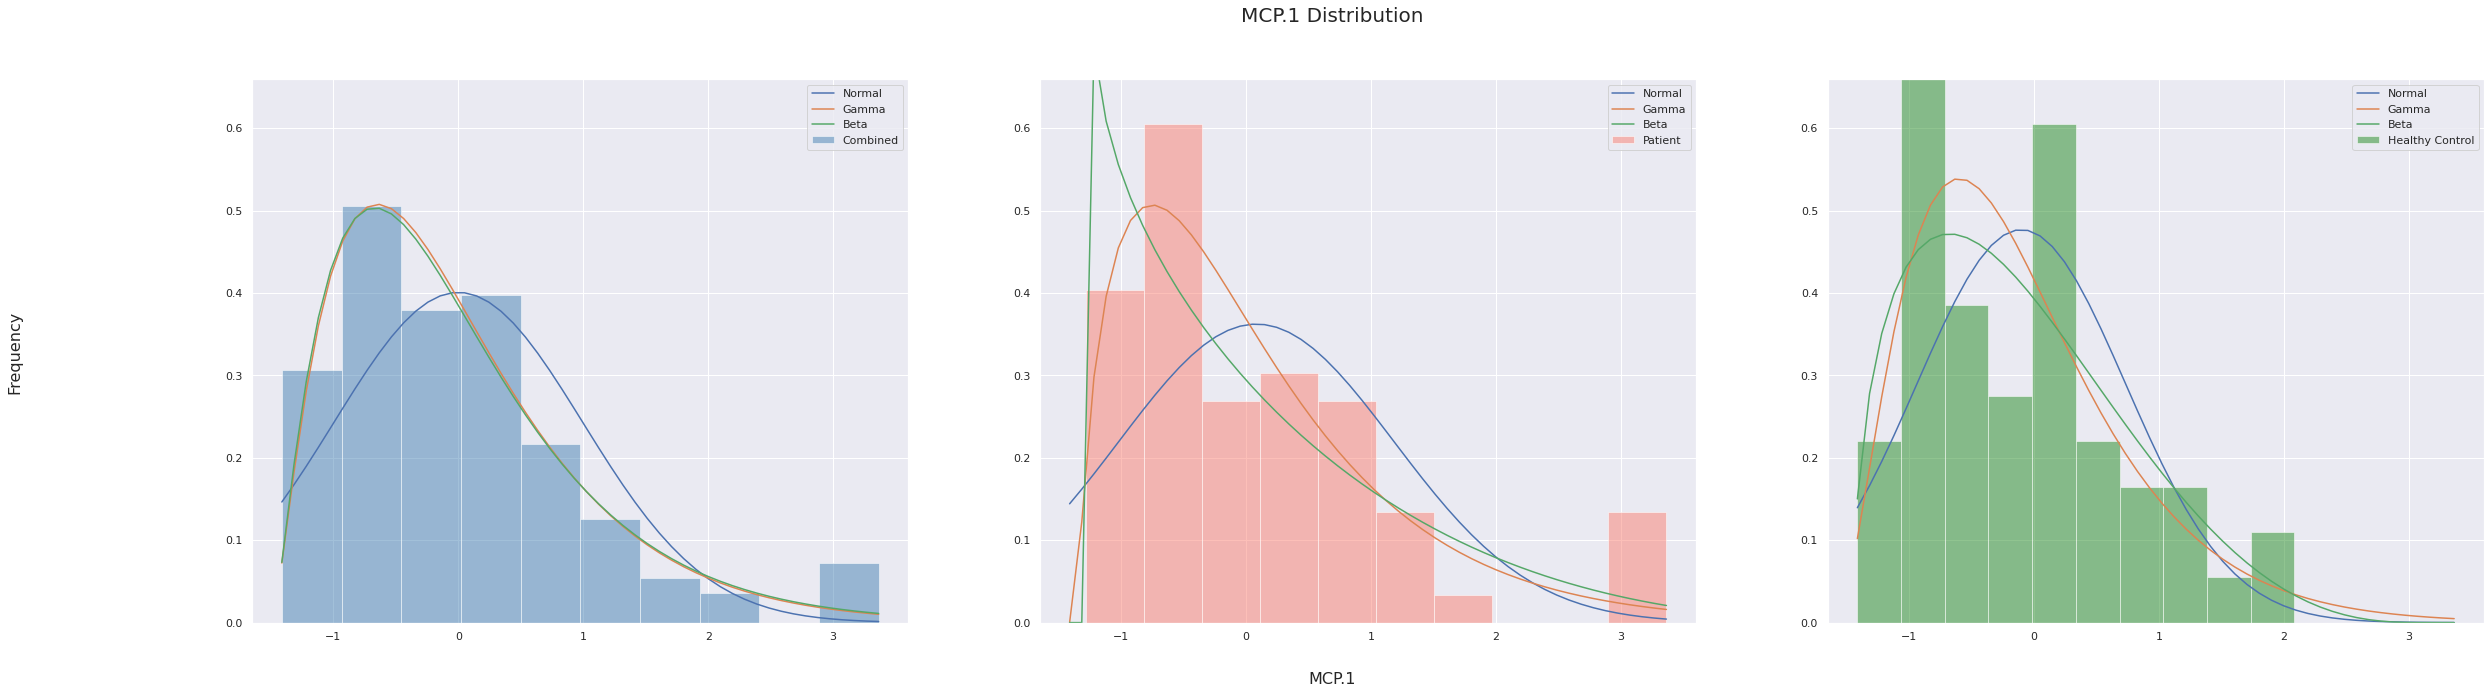

In [29]:
column = 'MCP.1'
plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

No evident distributions for MCP.1 distribution.

## Distribution Modeling Report

1. Age: NA
2. BMI: Normal, Beta
3. Glucose: Beta, Gamma
4. Insulin: Beta
5. HOMA: Beta, Gamma
6. Leptin: Gamma
7. Adiponectin: Gamma
8. Resistin: Beta
9. MCP.1: NA

# Data Correlation Analysis

In statistics, correlation is any statistical relationship, whether causal or not, between two random variables or bivariate data. In this section, we are going to be mapping and visualizing data correlations and relationships. For example, do cancer patients have a relationship between higher glucose and higher HOMA? Is that relationship evident in healthy controls? For our whole data set, just cancer patients, and just healthy controls, we will be creating a correlation matrix and examining the relationships inside. As a note, values in the matrix will span from -1 to 1. A value of -1 means that the relationship is negative, 0 is no relationship, and 1 a perfect relationship. Also of note, a value will always have a correlation of 1 with itself (The value is actually the variance of the value but the variance is 1 due to standardized data).

## Combined Data

In [30]:
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


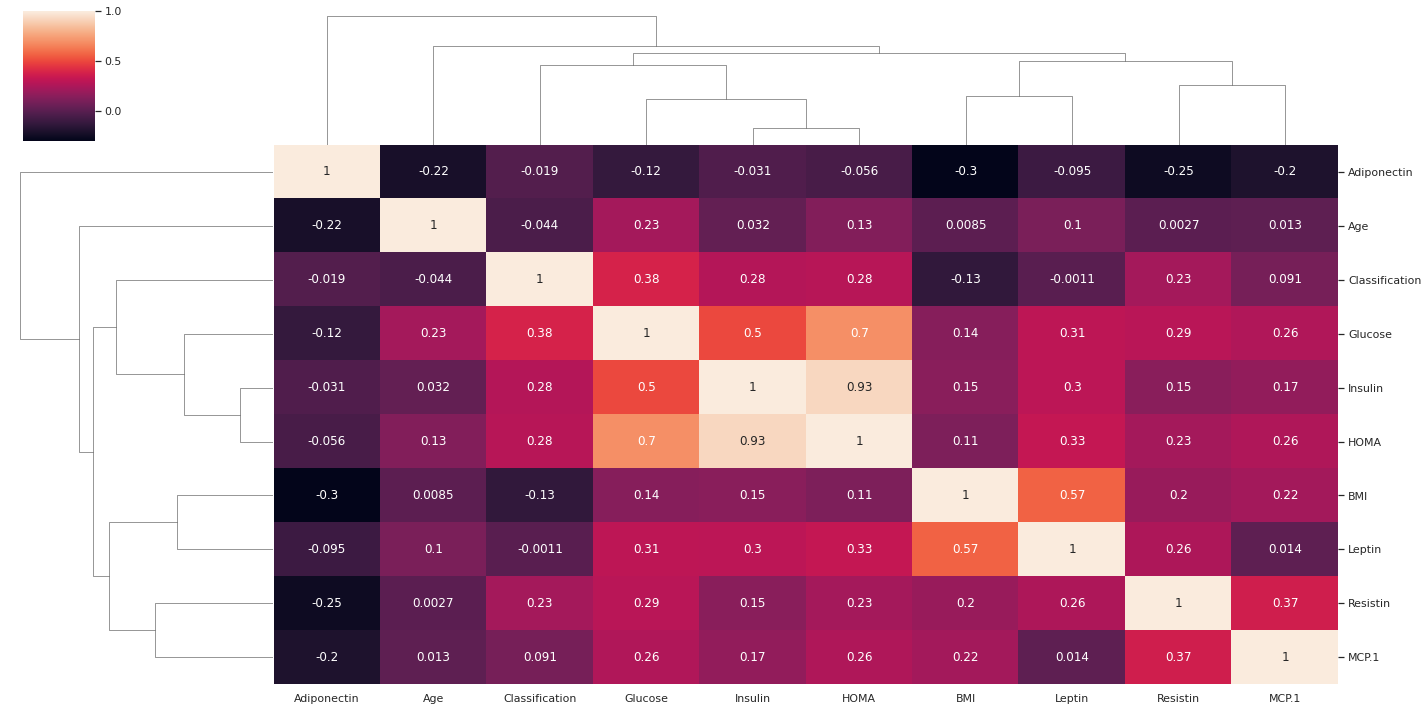

In [31]:
seaborn.clustermap(df.corr(), annot=True, figsize=(20, 10))
plt.show()

High Positive Correlations (> 0.5):  
1. Insulin, HOMA  
2. Glucose, HOMA  
3. Insulin, Glucose  

High Negative Correlations (< -0.5):  
1. NA

## Cancer Patient

In [32]:
df[df['Classification'] == 1].corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.241912,0.359848,0.082178,0.228361,0.439923,-0.080242,0.058133,0.082153,NaN
BMI,0.241912,1.000000,0.247906,0.160314,0.154479,0.548415,-0.128815,0.111519,0.211491,NaN
Glucose,0.359848,0.247906,1.000000,0.459591,0.682680,0.384968,-0.163290,0.259339,0.346189,NaN
Insulin,0.082178,0.160314,0.459591,1.000000,0.927059,0.334286,0.018523,0.111282,0.194944,NaN
HOMA,0.228361,0.154479,0.682680,0.927059,1.000000,0.397897,-0.040077,0.226977,0.307044,NaN
Leptin,0.439923,0.548415,0.384968,0.334286,0.397897,1.000000,0.018291,0.053920,-0.003389,NaN
Adiponectin,-0.080242,-0.128815,-0.163290,0.018523,-0.040077,0.018291,1.000000,-0.306866,-0.196351,NaN
Resistin,0.058133,0.111519,0.259339,0.111282,0.226977,0.053920,-0.306866,1.000000,0.482461,NaN
MCP.1,0.082153,0.211491,0.346189,0.194944,0.307044,-0.003389,-0.196351,0.482461,1.000000,NaN
Classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


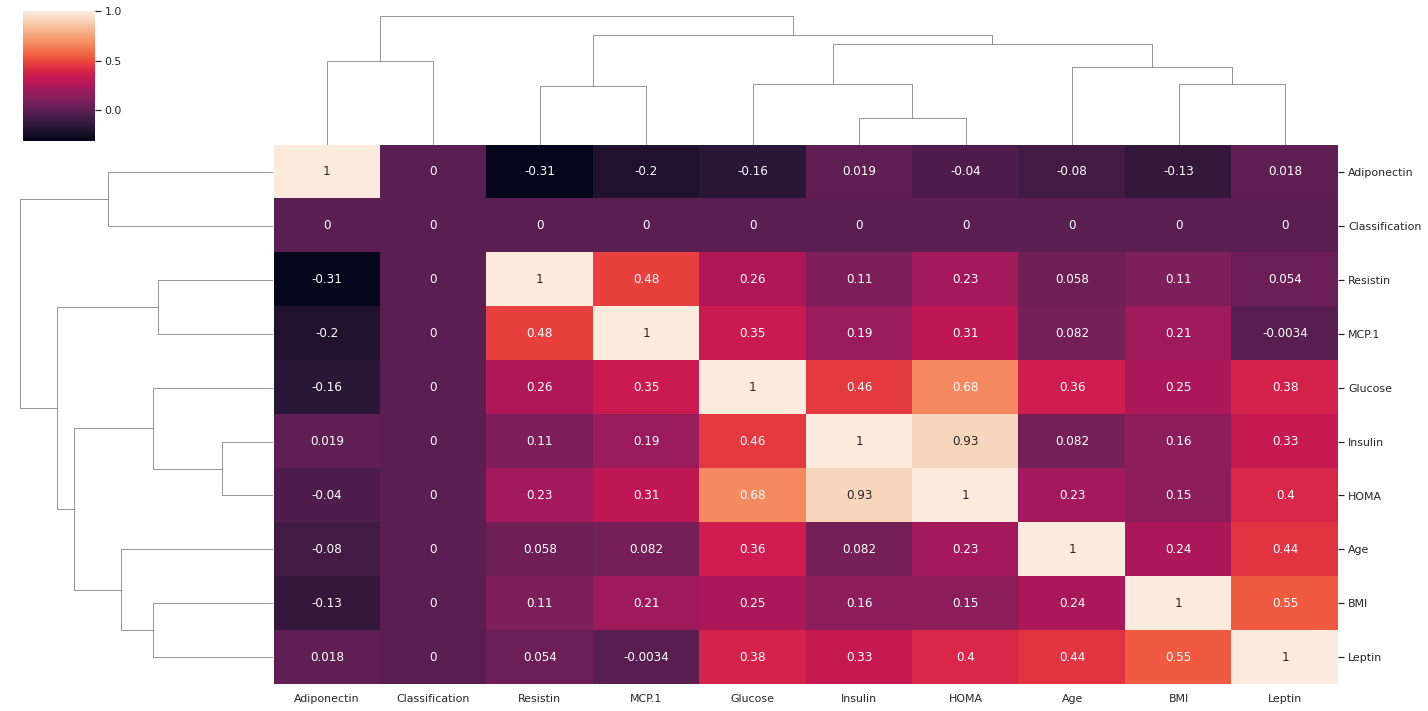

In [33]:
seaborn.clustermap(df[df['Classification'] == 1].corr().fillna(0), annot=True, figsize=(20, 10))
plt.show()

High Positive Correlations (> 0.5):  
1. Insulin, HOMA  
2. Glucose, HOMA  
3. BMI, Leptin   

High Negative Correlations (< -0.5):  
1. NA

## Healthy Control

In [34]:
df[df['Classification'] == 0].corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,-0.176180,0.221142,-0.006250,0.042411,-0.189287,-0.322010,-0.030198,-0.055342,NaN
BMI,-0.176180,1.000000,0.195587,0.359056,0.336683,0.605315,-0.461177,0.379597,0.290759,NaN
Glucose,0.221142,0.195587,1.000000,0.362250,0.469068,0.279218,-0.085989,0.178739,-0.108909,NaN
Insulin,-0.006250,0.359056,0.362250,1.000000,0.986871,0.358557,-0.155539,0.039139,0.022183,NaN
HOMA,0.042411,0.336683,0.469068,0.986871,1.000000,0.350791,-0.155852,0.049291,-0.013566,NaN
Leptin,-0.189287,0.605315,0.279218,0.358557,0.350791,1.000000,-0.209626,0.548039,0.042823,NaN
Adiponectin,-0.322010,-0.461177,-0.085989,-0.155539,-0.155852,-0.209626,1.000000,-0.203257,-0.217593,NaN
Resistin,-0.030198,0.379597,0.178739,0.039139,0.049291,0.548039,-0.203257,1.000000,0.134229,NaN
MCP.1,-0.055342,0.290759,-0.108909,0.022183,-0.013566,0.042823,-0.217593,0.134229,1.000000,NaN
Classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


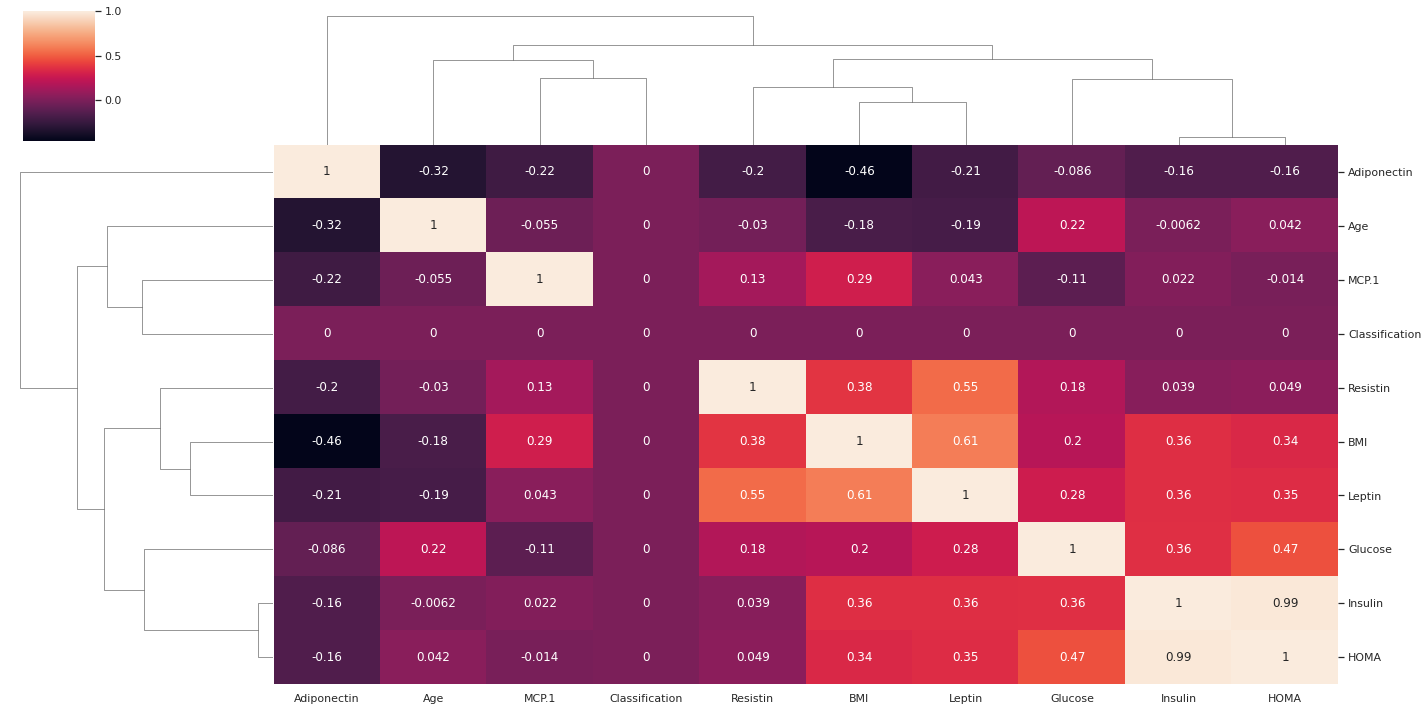

In [35]:
seaborn.clustermap(df[df['Classification'] == 0].corr().fillna(0), annot=True, figsize=(20, 10))
plt.show()

High Positive Correlations (> 0.5):  
1. Insulin, HOMA  
2. BMI, Leptin  
3. Resistin, Leptin

High Negative Correlations (< -0.5):  
1. NA

## Data Correlation Report

Cancer Patient
High Positive Correlations (> 0.5):  
1. Insulin, HOMA  
2. Glucose, HOMA  
3. BMI, Leptin  

Healthy Control  
High Positive Correlations (> 0.5):  
1. Insulin, HOMA  
2. BMI, Leptin  
3. Resistin, Leptin  

Cancer patients have a high correlation between glucose and HOMA while healthy controls do not.  
Healthy controls have a high correlation between resistin and leptin while cancer patients do not.

# Support Vector Machine Analysis

Now that we have performed all of our manual data analysis, let us jump into creating our prediction model. In order to do this, I have decided on using support vector machines or SVM. A support vector machine is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving a SVM model sets of labeled training data for each category, it is able to mathematically categorize the inputs. Essentially, we are going to use our individuals are inputs in order to create and train a model that can classify future inputs.

The basics of SVM are quite simple. Take in vector-based data (a vector of length 9 in our case; 1 dimension per each variable) and the vector's classification (cancer patient or healthy control). Should that input data be plotted, there exists a hyperplane that can divide the data in half by classification such that all of the points of one classification are on one side and all points of another are on the other side. This hyperplane should also maximize the margin between the closest points to the plane. If this hyperplane does not exist, apply a scale function to all the data until this hyperplane exists. The complex part of the algorithm is determining the hyperplane and scaling data until one exists, but that complex linear algebra and higher dimensional calculus has been implemented for us in libraries.

Read more about SVM: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:~:text=A%20support%20vector%20machine%20(SVM,able%20to%20categorize%20new%20text  

As usual, let us begin by defining functions that will assist us in our analysis.

In [36]:
def plot_box(data, title, xlabel, ylabel):
    create_plot(title, xlabel, ylabel)

    plt.boxplot(data)

    plt.show()

# Plot confusion matrix
def plot_confusion(classifier, testing_data, testing_label, display_labels):
    fig, ax = plt.subplots(figsize=(20, 10))

    plot_confusion_matrix(classifier, testing_data, testing_label, display_labels=display_labels, cmap=plt.cm.Blues, ax=ax)

    plt.grid(False)
    plt.show()

def determine_accuracy(df, number_iterations=10000):
    accuracy = np.zeros(shape=(number_iterations))

    for i in range(number_iterations):
        training_data, testing_data, training_label, testing_label = train_test_split(df.to_numpy()[:, :-1], df.to_numpy()[:, -1], test_size=0.15)

        classifier = svm.LinearSVC()
        classifier.fit(training_data, training_label)

        accuracy[i] = accuracy_score(testing_label, classifier.predict(testing_data))
    
    return accuracy, np.mean(accuracy)

Now, let us create our SVM. First, let us split up our data into training and testing. Basically, the SVM model will train on a portion of the data, then we will test it on another portion. For this model, let us do a 85% training, 15% testing split. Then, we will simply train the SVM on our training data, then run the model. It is important to know that we must also specify the labels of each data point (Classification).

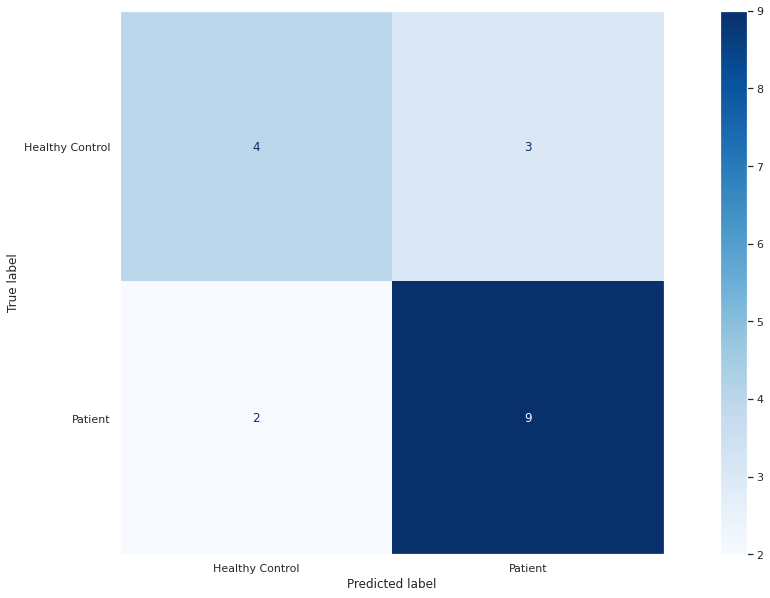

In [37]:
training_data, testing_data, training_label, testing_label = train_test_split(df.to_numpy()[:, :-1], df.to_numpy()[:, -1], test_size=0.15)

classifier = svm.LinearSVC()
classifier.fit(training_data, training_label)

plot_confusion(classifier, testing_data, testing_label, ['Healthy Control', 'Patient'])

Above we can see an output confusion matrix from our SVM. Our testing data consisted of 7 healthy control and 11 cancer patients. The SVM predicted, of the 7 healthy control that 4 were healthy and 3 had cancer, and of the 11 cancer patients, 2 were healthy and 9 had cancer. While this model is a fair output, let us test our model over 10000 iterations in order to get a more percise accuracy. We can also plot the distribution of accuracy over these iterations.

In [38]:
accuracies, accuracy = determine_accuracy(df)
print(f'Accuracy Over 10000 Iterations: {accuracy * 100}%')

Accuracy Over 10000 Iterations: 73.22722222222222%


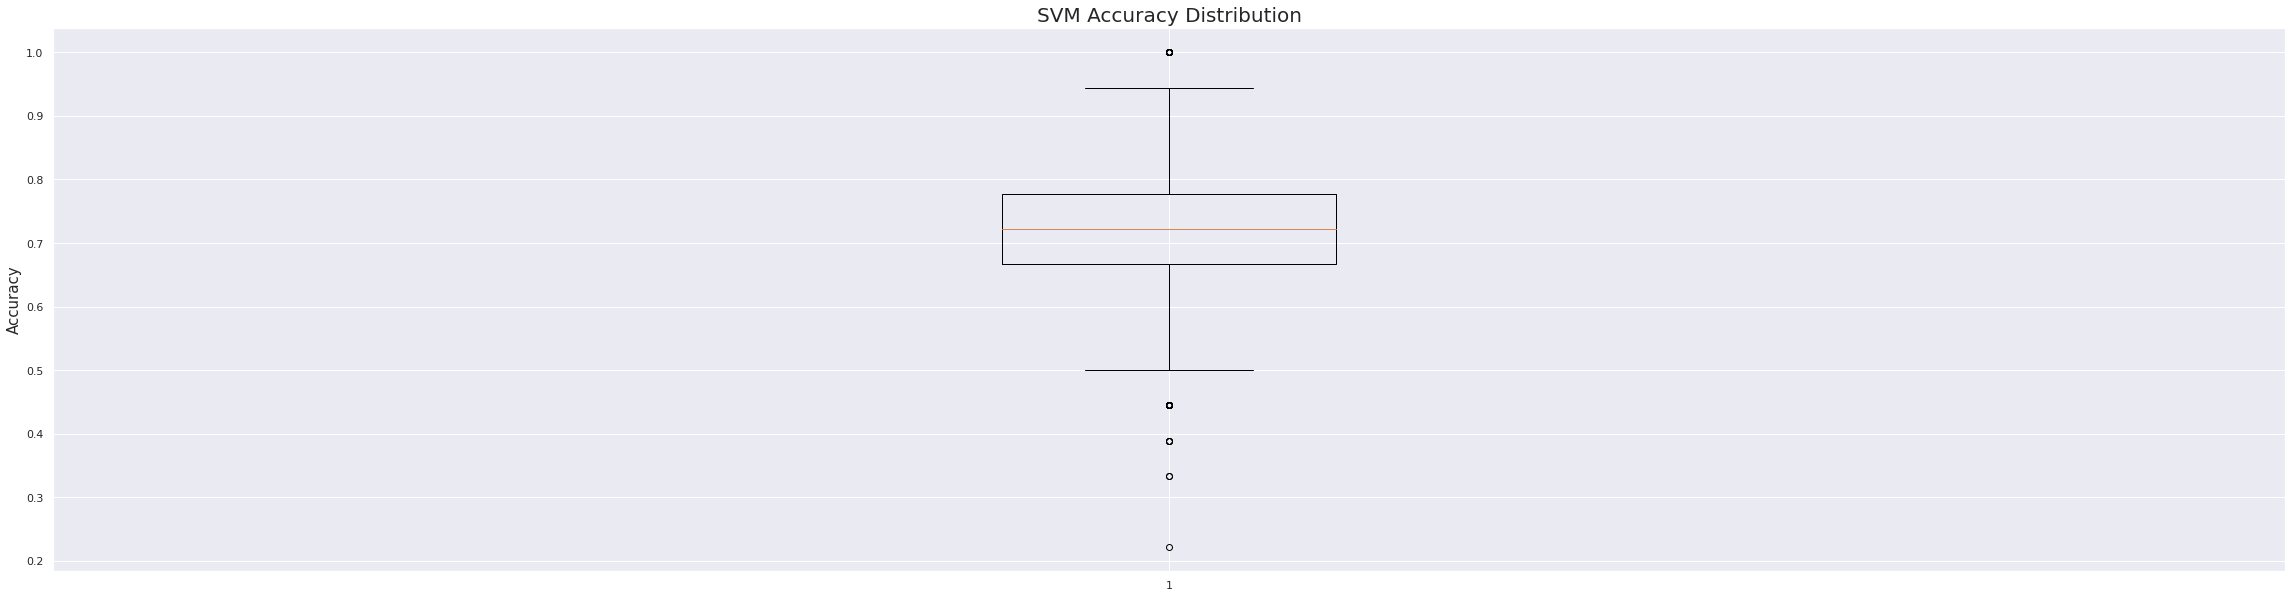

In [39]:
plot_box(accuracies, 'SVM Accuracy Distribution', '', 'Accuracy')

Over 10000 iterations, our SVM model predicted with an average accuracy of 73%, scoring a max of 100% and a low of 23%.

## Support Vector Machine Report

Overall, the SVM prediction model was quite accurate, significantly better than guessing (50% accuracy). While the accuracy is not perfect, out SVM model was only being trained on around 100 individuals. With prediciton model training, the more models it trains on, the more accurate the model. Should more patient and control data have been available, there is a potential for the model to have been more accurate.

# Conclusion

Through our analysis and models, we have shown that there is some ability to predict breast cancer in women through anthropometric and blood information.  
As shown in the univariate variable analysis, 

>
1. Age: Cancer patients tend to be younger than healthy controls
2. BMI: Cancer patients tend to have higher BMI than healthy controls
3. Glucose: Cancer patients tend to have higher glucose than healthy controls
4. Insulin: Cancer patients tend to have much higher insulin than healthy controls 
5. HOMA: Cancer patients tend to have higher HOMA than healthy controls
6. Leptin: No significant trend determined
7. Adiponectin: No significant trend determined
8. Resistin: Cancer patients tend to have slightly higher resistin than healthy controls
9. MCP.1: Cancer patients tend to have slightly higher MCP.1 than healthy controls  

there does exist some differences in the measurements taken from cancer patients and the healthy control.  

As shown in the distribution analysis,  

>
1. Age: NA
2. BMI: Normal, Beta
3. Glucose: Beta, Gamma
4. Insulin: Beta
5. HOMA: Beta, Gamma
6. Leptin: Gamma
7. Adiponectin: Gamma
8. Resistin: Beta
9. MCP.1: NA  

there is, in most instances, the ability to fit a distribution to collected data in order to derive more information from the data.  

As shown in our data correlation analysis,  

>
1. Cancer patients have a high correlation between glucose and HOMA while healthy controls do not.  
2. Healthy controls have a high correlation between resistin and leptin while cancer patients do not.

there exists differences in correlated variables between cancer patients and healthy controls.  

Finally, we showed through the creation of an SVM prediciton model that the ability to predit breast cancer has an accuracy of ~73%.